#Projeto - TCC da Pós Graduação em Data Science


Data:  Abril/2025

Autor: Simone Rodrigues da Silva

Matrícula:

Objetivo:  Estudo para criar uma modelo para prever o volume de venda de um determinado produto em um determinado pais


Base de dados:  Utilizado base de dados disponibilizado pela plataforma Kaggle




---


#1. Preparação de Ambiente

Habilta diretório de trabalhos, abertura de imagem e vídeos externos.
Importação de bibliotecas e funções que serão usados em todo o programa.


In [74]:
# Usando os dados que estão no GOOGLE DRIVER
colab_folder = 'Venda de Adesivos'

if colab_folder: # Autorize o Colab com copiando o Token gerado no link

    from google.colab import drive # Importa método para trabalhar com as pastas do Google Drive
    drive.mount('/content/gdrive') # Monta e disponibiliza o sistema de arquivos no Colab (linux)
    # Navega para a sua pasta de arquivos das aulas
    %cd gdrive/MyDrive/{colab_folder}
    ! ls # Comando do linux para listar o conteúdo da pasta de trabalho ativa

from IPython.display import Image as img # Importa função para abrir imagens
from IPython.display import YouTubeVideo as video # Importa função para passar vídeos

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'gdrive/MyDrive/Venda de Adesivos'
/content/gdrive/MyDrive/Venda de Adesivos
 advanced-eda-ml-predictions.ipynb
 comparacao_real_vs_predito_2025-04-05_20-57-44.png
 complete-guide-on-time-series-analysis-in-python.ipynb
 DataSets
 grafico_previsao_2025-04-05_21-37-30.png
 grafico_previsao_2025-04-05_22-03-13.png
 grafico_previsao_2025-04-05_22-07-50.png
 kaggle.json
 previsao_mes_atual_2025-04-05_21-21-19.csv
 previsao_mes_atual_2025-04-05_21-22-23.csv
 previsao_mes_atual_2025-04-05_21-31-14.csv
 previsao_mes_atual_2025-04-05_21-37-30.csv
 previsao_mes_atual_2025-04-05_22-02-52.csv
 previsao_mes_atual_2025-04-05_22-05-32.csv
 resultado_predicoes_2025-04-05_20-56-13.csv
 resultado_predicoes_2025-04-05_21-10-27.csv
 resultado_predicoes.csv
 sample_submission.csv
 submission.csv
 test.csv
 train.csv
'Venda de Adesivos.ipynb

In [75]:
# Importando as bibliotecas básicas
import os               # biblitoeca de interação com o sistema operacional
import datetime         # biblioteca de funções de data e hora
import warnings
import pandas as pd     # manipulação de dados em formato de dataframe
import numpy as np      # biblioteca para operações matemáticas
import matplotlib.pyplot as plt     # bilbioteca de visualização de dados
import seaborn as sns       # biblioteca de visualização de informações estatísticas
import sklearn              # biblioteca para analise preditiva de dados
import scipy.stats as stats  # biblioteca de funções estatística
import statsmodels.api as sm  #  bibiloteca de modelagem estatística
import plotly.graph_objs as go  # gráficos em 3D


warnings.filterwarnings("ignore")  # Ignora todos os warnings
from datetime import datetime, timedelta   #tratamento de informações do tipo data
#from statsmodels.iolib.summary2 import summary_col # comparações entre modelos
from sklearn.preprocessing import LabelEncoder, OneHotEncoder   # transformação de dados
from sklearn.model_selection import train_test_split   #split de dados para treinamento de modelo

# Treinamento de modelos
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
#from catboost import CatBoostRegressor

# Métricas para regressão
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# To save the model
#import pickle

In [76]:
# Atualização das bibliotecas
#print(sklearn.__version__)       # Apresenta a versão instalada da biblioteca
#!pip install -U scikit-learn     # Atualiza a versão da bibliteca

In [187]:
# Função para gerar Data e Hora  (usada principalmente nos gráficos)
from datetime import datetime

def gerar_timestamp():
    """
    Retorna a data e hora atual no formato 'YYYY-MM-DD_HH-MM-SS'
    Útil para nomear arquivos de forma única e rastreável.
    """
    return datetime.now().strftime('%Y-%m-%d_%H-%M-%S')



---


# 2. Trabalhando com os dados bases (arquivos de train e test disponibilizados)

---



In [246]:
# Abertura dos arquivos com os dados.
df_train = pd.read_csv('xTrain.csv', sep=";")
df_test  = pd.read_csv('xTest.csv', sep=";")

2.1 - Trabalhando com os dados da base de treinamento



---



In [79]:
# Demostrando a estrtutura dos dados.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB


In [80]:
# Função Shape (Quantidade linhas e Colunas).
print("Linhas:",df_train.shape[0])
print("Colunas:",df_train.shape[1])

Linhas: 230130
Colunas: 6


In [81]:
# Alguns números relacionados aos dados.
df_train.describe().round(2)

,id,num_sold
count,230130.00,221259.00
mean,115064.50,7525.27
std,66432.95,6901.65
min,0.00,50.00
25%,57532.25,2190.00
50%,115064.50,6050.00
75%,172596.75,11140.00
max,230129.00,59390.00


In [82]:
# Possui dados nulos por coluna ? Se sim, qual a quantidade e percentual em relação ao tamanho do arquivo.
nulos_por_coluna = df_train.isna().sum()
percentual_nulos = (df_train.isna().sum() / len(df_train)) * 100

print(f"Total de valores nulos por coluna:\n{nulos_por_coluna}")
print("\n")
print(f"Total de valores nulos por coluna em %:\n{percentual_nulos}")

Total de valores nulos por coluna:
id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64


Total de valores nulos por coluna em %:
id          0.000000
date        0.000000
country     0.000000
store       0.000000
product     0.000000
num_sold    3.854778
dtype: float64


In [83]:
# Apagando os registros vazios, porque o % é baixo em relação a quantidade de amostras.
df_train.dropna(inplace=True)
## Função Shape
print("Linhas:",df_train.shape[0])

Linhas: 221259


In [84]:
# Possui dados duplicados ?
duplicados = df_train.duplicated().sum()
print(f"Número de linhas duplicadas: {duplicados}")

Número de linhas duplicadas: 0


In [85]:
# Apresentando os valores máximos e mínimos
maior_valor = df_train['num_sold'].max()
menor_valor = df_train['num_sold'].min()
print(f"Maior valor de 'num_sold': {maior_valor}")
print(f"Menor valor de 'num_sold': {menor_valor}")

Maior valor de 'num_sold': 59390.0
Menor valor de 'num_sold': 50.0


In [285]:
# Verifique a menor e a maior data
menor_data = df_train['date'].min()
maior_data = df_train['date'].max()

print("Menor data:", menor_data)
print("Maior data:", maior_data)


Menor data: 01/01/2010
Maior data: 31/12/2016


In [86]:
# Agrupar por país e contar o número de registros para cada país
quantidade_por_pais = df_train.groupby('country').size().reset_index(name='quantidade_linhas')
print(quantidade_por_pais)

     country  quantidade_linhas
0     Canada              34109
1    Finland              38355
2      Italy              38355
3      Kenya              33730
4     Norway              38355
5  Singapore              38355


In [87]:
# Agrupar por país e contar o número de registros para cada loja
quantidade_por_loja = df_train.groupby('store').size().reset_index(name='quantidade_linhas')
print(quantidade_por_loja)

                  store  quantidade_linhas
0     Discount Stickers              71531
1  Premium Sticker Mart              75684
2     Stickers for Less              74044


In [88]:
# Agrupar por país e contar o número de registros para cada produto
quantidade_por_produto = df_train.groupby('product').size().reset_index(name='quantidade_linhas')
print(quantidade_por_produto)

              product  quantidade_linhas
0   Holographic Goose              37220
1              Kaggle              46026
2        Kaggle Tiers              46026
3            Kerneler              45962
4  Kerneler Dark Mode              46025


In [89]:
# Agrupar por country, store e product, somando as vendas e contando as linhas
resumo = df_train.groupby(['country', 'store']).size().reset_index(name='quantidade_linhas')
print(resumo)

      country                 store  quantidade_linhas
0      Canada     Discount Stickers              10227
1      Canada  Premium Sticker Mart              12405
2      Canada     Stickers for Less              11477
3     Finland     Discount Stickers              12785
4     Finland  Premium Sticker Mart              12785
5     Finland     Stickers for Less              12785
6       Italy     Discount Stickers              12785
7       Italy  Premium Sticker Mart              12785
8       Italy     Stickers for Less              12785
9       Kenya     Discount Stickers              10164
10      Kenya  Premium Sticker Mart              12139
11      Kenya     Stickers for Less              11427
12     Norway     Discount Stickers              12785
13     Norway  Premium Sticker Mart              12785
14     Norway     Stickers for Less              12785
15  Singapore     Discount Stickers              12785
16  Singapore  Premium Sticker Mart              12785
17  Singap

Separando os produtos por pais + loja + produto

In [90]:
# Garante que a subpasta 'DataSets' exista no diretório
os.makedirs("DataSets", exist_ok=True)

# Agrupa por país, produto e loja
grupos = df_train.groupby(['country', 'store', 'product'])

# Dicionário para armazenar os dataframes separados
datasets = {}

# Itera pelos grupos e salva cada subconjunto no dicionário
for (pais, produto, loja), grupo in grupos:
    # Cria um nome de arquivo limpo
    nome_arquivo = f"{pais}_{produto}_Loja{loja}".replace(" ", "_")
    caminho_arquivo = os.path.join("DataSets", f"{nome_arquivo}.csv")

    # Salva no dicionário (opcional, caso queira trabalhar com os dataframes no Python)
    datasets[nome_arquivo] = grupo.reset_index(drop=True)

    # Salva o CSV no disco
    grupo.to_csv(caminho_arquivo, index=False)

    # Mostra o nome do arquivo gerado
    print(f"Arquivo gerado: {caminho_arquivo}")


Arquivo gerado: DataSets/Canada_Discount_Stickers_LojaKaggle.csv
Arquivo gerado: DataSets/Canada_Discount_Stickers_LojaKaggle_Tiers.csv
Arquivo gerado: DataSets/Canada_Discount_Stickers_LojaKerneler.csv
Arquivo gerado: DataSets/Canada_Discount_Stickers_LojaKerneler_Dark_Mode.csv
Arquivo gerado: DataSets/Canada_Premium_Sticker_Mart_LojaHolographic_Goose.csv
Arquivo gerado: DataSets/Canada_Premium_Sticker_Mart_LojaKaggle.csv
Arquivo gerado: DataSets/Canada_Premium_Sticker_Mart_LojaKaggle_Tiers.csv
Arquivo gerado: DataSets/Canada_Premium_Sticker_Mart_LojaKerneler.csv
Arquivo gerado: DataSets/Canada_Premium_Sticker_Mart_LojaKerneler_Dark_Mode.csv
Arquivo gerado: DataSets/Canada_Stickers_for_Less_LojaHolographic_Goose.csv
Arquivo gerado: DataSets/Canada_Stickers_for_Less_LojaKaggle.csv
Arquivo gerado: DataSets/Canada_Stickers_for_Less_LojaKaggle_Tiers.csv
Arquivo gerado: DataSets/Canada_Stickers_for_Less_LojaKerneler.csv
Arquivo gerado: DataSets/Canada_Stickers_for_Less_LojaKerneler_Dark_Mo

2.2 - Trabalhando com os dados da base de teste



---

In [91]:
# Demostrando a estrtutura dos dados.
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98550 entries, 0 to 98549
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       98550 non-null  int64 
 1   date     98550 non-null  object
 2   country  98550 non-null  object
 3   store    98550 non-null  object
 4   product  98550 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [92]:
# Função Shape (Quantidade linhas e Colunas).
print("Linhas:",df_test.shape[0])
print("Colunas:",df_test.shape[1])

Linhas: 98550
Colunas: 5


In [93]:
# Alguns números relacionados aos dados.
df_test.describe().round(2)

,id
count,98550.00
mean,279404.50
std,28449.08
min,230130.00
25%,254767.25
50%,279404.50
75%,304041.75
max,328679.00


In [94]:
# Possui dados nulos por coluna ? Se sim, qual a quantidade e percentual em relação ao tamanho do arquivo.
nulos_por_coluna = df_test.isna().sum()
percentual_nulos = (df_test.isna().sum() / len(df_test)) * 100

print(f"Total de valores nulos por coluna:\n{nulos_por_coluna}")
print("\n")
print(f"Total de valores nulos por coluna em %:\n{percentual_nulos}")

Total de valores nulos por coluna:
id         0
date       0
country    0
store      0
product    0
dtype: int64


Total de valores nulos por coluna em %:
id         0.0
date       0.0
country    0.0
store      0.0
product    0.0
dtype: float64


In [95]:
# Possui dados duplicados ?
duplicados = df_test.duplicated().sum()
print(f"Número de linhas duplicadas: {duplicados}")

Número de linhas duplicadas: 0


In [286]:
# Certifique-se de que a coluna está no formato datetime

# Verifique a menor e a maior data
menor_data = df_test['date'].min()
maior_data = df_test['date'].max()

print("Menor data:", menor_data)
print("Maior data:", maior_data)


Menor data: 01/01/2017
Maior data: 31/12/2019


In [96]:
# Agrupar por country, store e product, somando as vendas e contando as linhas
resumo = df_test.groupby(['country', 'store']).size().reset_index(name='quantidade_linhas')
print(resumo)

      country                 store  quantidade_linhas
0      Canada     Discount Stickers               5475
1      Canada  Premium Sticker Mart               5475
2      Canada     Stickers for Less               5475
3     Finland     Discount Stickers               5475
4     Finland  Premium Sticker Mart               5475
5     Finland     Stickers for Less               5475
6       Italy     Discount Stickers               5475
7       Italy  Premium Sticker Mart               5475
8       Italy     Stickers for Less               5475
9       Kenya     Discount Stickers               5475
10      Kenya  Premium Sticker Mart               5475
11      Kenya     Stickers for Less               5475
12     Norway     Discount Stickers               5475
13     Norway  Premium Sticker Mart               5475
14     Norway     Stickers for Less               5475
15  Singapore     Discount Stickers               5475
16  Singapore  Premium Sticker Mart               5475
17  Singap

Separando os produtos por pais + loja + produto

In [97]:
# Garante que a subpasta 'DataSets' exista no diretório
os.makedirs("DataSets", exist_ok=True)

# Agrupa por país, produto e loja
grupos = df_test.groupby(['country', 'store', 'product'])

# Dicionário para armazenar os dataframes separados
datasets = {}

# Itera pelos grupos e salva cada subconjunto no dicionário
for (pais, produto, loja), grupo in grupos:
    # Cria um nome de arquivo limpo
    nome_arquivo = f"test_{pais}_{produto}_Loja{loja}".replace(" ", "_")
    caminho_arquivo = os.path.join("DataSets", f"{nome_arquivo}.csv")

    # Salva no dicionário (opcional, caso queira trabalhar com os dataframes no Python)
    datasets[nome_arquivo] = grupo.reset_index(drop=True)

    # Salva o CSV no disco
    grupo.to_csv(caminho_arquivo, index=False)

    # Mostra o nome do arquivo gerado
    print(f"Arquivo gerado: {caminho_arquivo}")


Arquivo gerado: DataSets/test_Canada_Discount_Stickers_LojaHolographic_Goose.csv
Arquivo gerado: DataSets/test_Canada_Discount_Stickers_LojaKaggle.csv
Arquivo gerado: DataSets/test_Canada_Discount_Stickers_LojaKaggle_Tiers.csv
Arquivo gerado: DataSets/test_Canada_Discount_Stickers_LojaKerneler.csv
Arquivo gerado: DataSets/test_Canada_Discount_Stickers_LojaKerneler_Dark_Mode.csv
Arquivo gerado: DataSets/test_Canada_Premium_Sticker_Mart_LojaHolographic_Goose.csv
Arquivo gerado: DataSets/test_Canada_Premium_Sticker_Mart_LojaKaggle.csv
Arquivo gerado: DataSets/test_Canada_Premium_Sticker_Mart_LojaKaggle_Tiers.csv
Arquivo gerado: DataSets/test_Canada_Premium_Sticker_Mart_LojaKerneler.csv
Arquivo gerado: DataSets/test_Canada_Premium_Sticker_Mart_LojaKerneler_Dark_Mode.csv
Arquivo gerado: DataSets/test_Canada_Stickers_for_Less_LojaHolographic_Goose.csv
Arquivo gerado: DataSets/test_Canada_Stickers_for_Less_LojaKaggle.csv
Arquivo gerado: DataSets/test_Canada_Stickers_for_Less_LojaKaggle_Tiers.



---


#3. Leitura dos dados (finais) de trabalho (df_work  = dados de treinamento )


---





In [98]:
# Define o caminho do arquivo dentro da subpasta "Datasets"
caminho_arquivo = os.path.join("DataSets", "Canada_Discount_Stickers_LojaKaggle_Tiers.csv")

# Abertura do arquivo
df_work = pd.read_csv(caminho_arquivo, sep=",")

# Visualiza as primeiras linhas
df_work.head()

,id,date,country,store,product,num_sold
0,2,01/01/2010,Canada,Discount Stickers,Kaggle Tiers,9060.0
1,92,02/01/2010,Canada,Discount Stickers,Kaggle Tiers,8540.0
2,182,03/01/2010,Canada,Discount Stickers,Kaggle Tiers,8390.0
3,272,04/01/2010,Canada,Discount Stickers,Kaggle Tiers,6090.0
4,362,05/01/2010,Canada,Discount Stickers,Kaggle Tiers,6400.0


Tratamento para a sazonalidade nos dados de venda

In [99]:
#  Função para separar dia, mês e ano.
def extrair_informacoes_data(df):
    # Garantir que a coluna 'date' está no formato datetime
    df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

    # Extrair as informações de data
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['weekday'] = df['date'].dt.weekday
    df['day'] = df['date'].dt.day
    df['week_year'] = df['date'].dt.isocalendar().week

    return df

In [100]:
# Aplicar tratamento de separação de datas
df_work = extrair_informacoes_data(df_work)
df_work.head()

,id,date,country,store,product,num_sold,year,month,weekday,day,week_year
0,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,9060.0,2010,1,4,1,53
1,92,2010-01-02,Canada,Discount Stickers,Kaggle Tiers,8540.0,2010,1,5,2,53
2,182,2010-01-03,Canada,Discount Stickers,Kaggle Tiers,8390.0,2010,1,6,3,53
3,272,2010-01-04,Canada,Discount Stickers,Kaggle Tiers,6090.0,2010,1,0,4,1
4,362,2010-01-05,Canada,Discount Stickers,Kaggle Tiers,6400.0,2010,1,1,5,1


In [101]:
# Função para identificar a estação do ano no país: Canadá
def estacao_canada(mes, dia):
    if (mes == 12 and dia >= 21) or (1 <= mes <= 2) or (mes == 3 and dia < 21):
        return 'Winter'
    elif (mes == 3 and dia >= 21) or (4 <= mes <= 5) or (mes == 6 and dia < 21):
        return 'Spring'
    elif (mes == 6 and dia >= 21) or (7 <= mes <= 8) or (mes == 9 and dia < 23):
        return 'Summer'
    else:
        return 'Autumn'

# Cria uma nova coluna com estação
seasons = []
for i in range(len(df_work)):
    mes = df_work.loc[i, 'month']
    dia = df_work.loc[i, 'day']
    estacao = estacao_canada(mes, dia)
    seasons.append(estacao)

# Adiciona a coluna no dataframe
df_work['season'] = seasons

# Apresentando os novos dados
df_work.head()

,id,date,country,store,product,num_sold,year,month,weekday,day,week_year,season
0,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,9060.0,2010,1,4,1,53,Winter
1,92,2010-01-02,Canada,Discount Stickers,Kaggle Tiers,8540.0,2010,1,5,2,53,Winter
2,182,2010-01-03,Canada,Discount Stickers,Kaggle Tiers,8390.0,2010,1,6,3,53,Winter
3,272,2010-01-04,Canada,Discount Stickers,Kaggle Tiers,6090.0,2010,1,0,4,1,Winter
4,362,2010-01-05,Canada,Discount Stickers,Kaggle Tiers,6400.0,2010,1,1,5,1,Winter


In [102]:
# Tratando as informações categóricas (transformando para Dummies)

# Inicializa o LabelEncoder
label_encoder = LabelEncoder()

# Lista de colunas categóricas
categoricas = [ 'season']

# Aplica fit_transform em cada coluna
for col in categoricas:
    df_work[col] = label_encoder.fit_transform(df_work[col])

df_work.head()

,id,date,country,store,product,num_sold,year,month,weekday,day,week_year,season
0,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,9060.0,2010,1,4,1,53,3
1,92,2010-01-02,Canada,Discount Stickers,Kaggle Tiers,8540.0,2010,1,5,2,53,3
2,182,2010-01-03,Canada,Discount Stickers,Kaggle Tiers,8390.0,2010,1,6,3,53,3
3,272,2010-01-04,Canada,Discount Stickers,Kaggle Tiers,6090.0,2010,1,0,4,1,3
4,362,2010-01-05,Canada,Discount Stickers,Kaggle Tiers,6400.0,2010,1,1,5,1,3


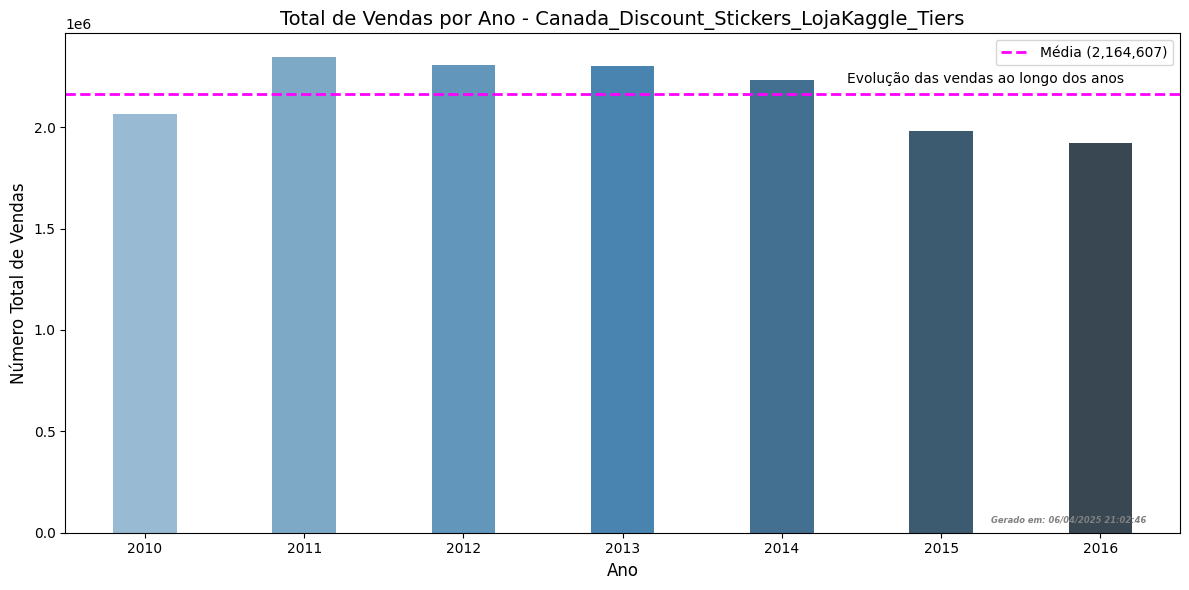

In [103]:
# Agrupar as vendas por ano
vendas_por_ano = df_work.groupby('year')['num_sold'].sum().reset_index()

# Calcular a média de vendas no período
media_vendas = vendas_por_ano['num_sold'].mean()

# Plotando o gráfico de barras com colunas mais finas (usando largura menor no barplot)
plt.figure(figsize=(12, 6))
sns.barplot(data=vendas_por_ano, x='year', y='num_sold', palette='Blues_d', width=0.4)  # width menor = colunas mais finas

# Adicionar linha horizontal da média
plt.axhline(media_vendas, color='magenta', linestyle='--', linewidth=2, label=f'Média ({int(media_vendas):,})')

# Títulos e labels
plt.title('Total de Vendas por Ano - Canada_Discount_Stickers_LojaKaggle_Tiers', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número Total de Vendas', fontsize=12)

# Adicionando texto explicativo no gráfico
texto_explicativo = "Evolução das vendas ao longo dos anos"
plt.text(0.95, 0.9, texto_explicativo, horizontalalignment='right',
         transform=plt.gca().transAxes, fontsize=10, color='black')

# Data e hora
data_hora_atual = datetime.now().strftime('%d/%m/%Y %H:%M:%S')
plt.text(0.97, 0.02, f'Gerado em: {data_hora_atual}', horizontalalignment='right',
         transform=plt.gca().transAxes, color = 'gray', fontsize=6, fontstyle='italic', fontweight='bold')

# Legenda
plt.legend()

# Exportar (simulado)
exportar = 'nao'
if exportar == 'sim':
    nome_arquivo = f"vendas_por_quarter_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png"
    plt.savefig(nome_arquivo, dpi=300)
    print(f"Gráfico exportado como '{nome_arquivo}'.")

# Mostrar gráfico
plt.tight_layout()
plt.show()


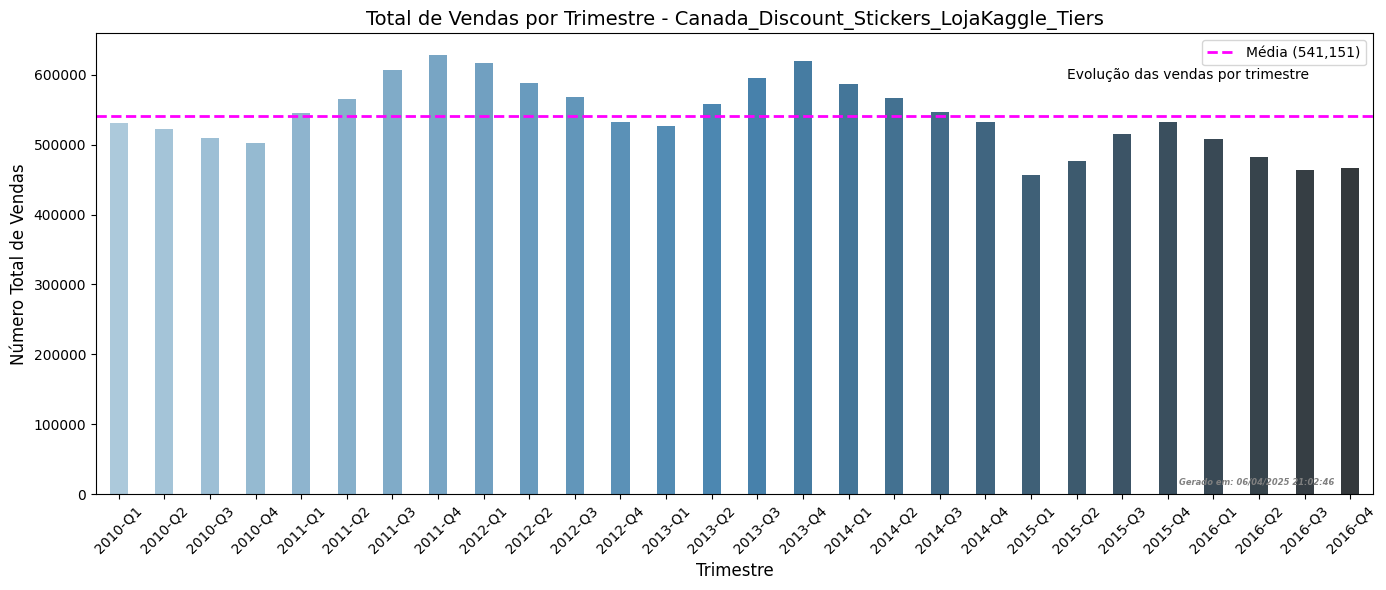

In [104]:
# Apresentar venda por quarter + ano

# Criar a coluna de trimestre (quarter)
df_work['quarter'] = df_work['date'].dt.quarter

# Criar identificador 'YYYY-QX'
df_work['year_quarter'] = df_work['year'].astype(str) + '-Q' + df_work['quarter'].astype(str)

# Agrupar as vendas por trimestre
vendas_por_quarter = df_work.groupby('year_quarter')['num_sold'].sum().reset_index()

# Calcular média das vendas por trimestre
media_vendas_quarter = vendas_por_quarter['num_sold'].mean()

# Plotar o gráfico
plt.figure(figsize=(14, 6))
sns.barplot(data=vendas_por_quarter, x='year_quarter', y='num_sold', palette='Blues_d', width=0.4)

# Linha da média
plt.axhline(media_vendas_quarter, color='magenta', linestyle='--', linewidth=2, label=f'Média ({int(media_vendas_quarter):,})')

# Títulos e labels
plt.title('Total de Vendas por Trimestre - Canada_Discount_Stickers_LojaKaggle_Tiers', fontsize=14)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Número Total de Vendas', fontsize=12)

# Rotacionar rótulos do eixo X
plt.xticks(rotation=45)

# Texto explicativo
plt.text(0.95, 0.9, 'Evolução das vendas por trimestre', horizontalalignment='right',
         transform=plt.gca().transAxes, fontsize=10, color='black')

# Data e hora
data_hora_atual = datetime.now().strftime('%d/%m/%Y %H:%M:%S')
plt.text(0.97, 0.02, f'Gerado em: {data_hora_atual}', horizontalalignment='right',
         transform=plt.gca().transAxes, color = 'gray', fontsize=6, fontstyle='italic', fontweight='bold')

# Legenda
plt.legend()

# Exportar (simulado)
exportar = 'nao'
if exportar == 'sim':
    nome_arquivo = f"vendas_por_quarter_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png"
    plt.savefig(nome_arquivo, dpi=300)
    print(f"Gráfico exportado como '{nome_arquivo}'.")

# Mostrar gráfico
plt.tight_layout()
plt.show()

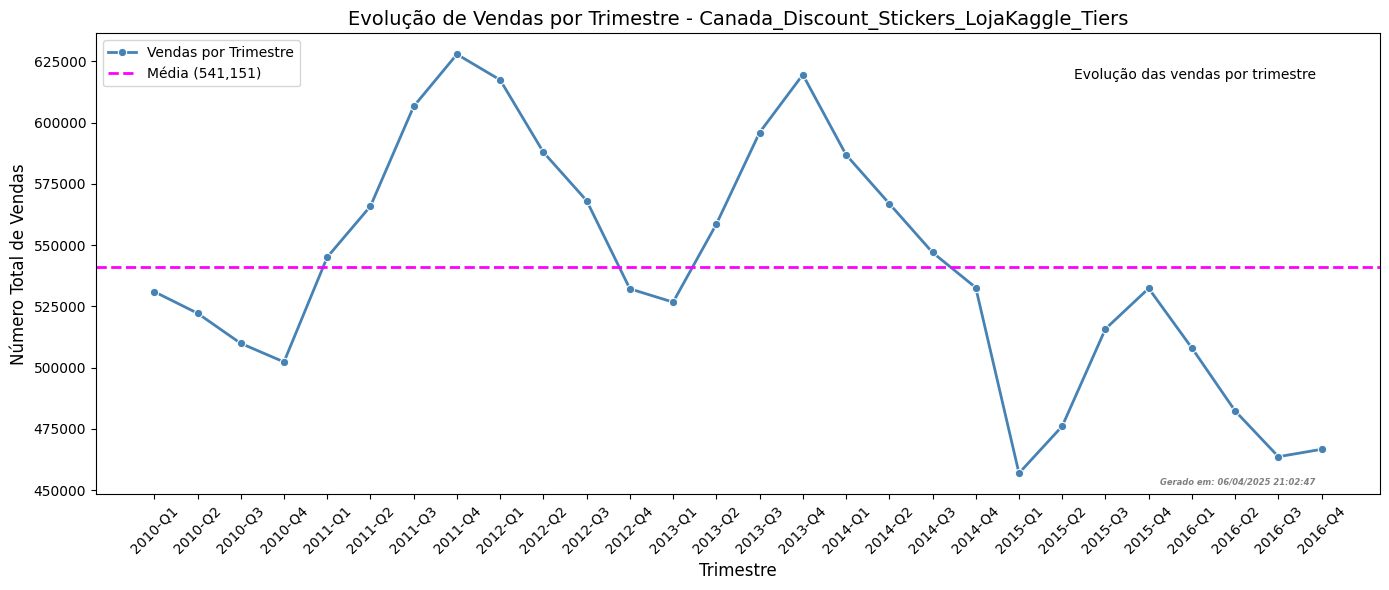

In [105]:
# Apresentar venda por quarter + ano

# Criar a coluna de trimestre (quarter)
df_work['quarter'] = df_work['date'].dt.quarter

# Criar identificador 'YYYY-QX'
df_work['year_quarter'] = df_work['year'].astype(str) + '-Q' + df_work['quarter'].astype(str)

# Agrupar as vendas por trimestre
vendas_por_quarter = df_work.groupby('year_quarter')['num_sold'].sum().reset_index()

# Calcular média das vendas por trimestre
media_vendas_quarter = vendas_por_quarter['num_sold'].mean()

# Plotar o gráfico de linha
plt.figure(figsize=(14, 6))
sns.lineplot(data=vendas_por_quarter, x='year_quarter', y='num_sold', marker='o', linewidth=2, color='steelblue', label='Vendas por Trimestre')

# Linha da média
plt.axhline(media_vendas_quarter, color='magenta', linestyle='--', linewidth=2, label=f'Média ({int(media_vendas_quarter):,})')

# Títulos e labels
plt.title('Evolução de Vendas por Trimestre - Canada_Discount_Stickers_LojaKaggle_Tiers', fontsize=14)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Número Total de Vendas', fontsize=12)

# Rotacionar os rótulos do eixo X
plt.xticks(rotation=45)

# Texto explicativo
plt.text(0.95, 0.9, 'Evolução das vendas por trimestre', horizontalalignment='right',
         transform=plt.gca().transAxes, fontsize=10, color='black')

# Data e hora de geração
data_hora_atual = datetime.now().strftime('%d/%m/%Y %H:%M:%S')
plt.text(0.95, 0.02, f'Gerado em: {data_hora_atual}', horizontalalignment='right',
         transform=plt.gca().transAxes, color = 'gray', fontsize=6, fontstyle='italic', fontweight='bold')

# Legenda
plt.legend()

# Exportar (simulado)
exportar = 'nao'
if exportar == 'sim':
    nome_arquivo = f"vendas_por_quarter_linha_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png"
    plt.savefig(nome_arquivo, dpi=300)
    print(f"Gráfico exportado como '{nome_arquivo}'.")

# Mostrar gráfico
plt.tight_layout()
plt.show()

In [106]:
# Apagando as colunas que não serão necessárias para análise do modelo
# Drop id and date column from dataset
df_work = df_work.drop(columns=['date', 'id', 'country', 'store', 'product', 'quarter', 'year_quarter' ])
df_work.head()

,num_sold,year,month,weekday,day,week_year,season
0,9060.0,2010,1,4,1,53,3
1,8540.0,2010,1,5,2,53,3
2,8390.0,2010,1,6,3,53,3
3,6090.0,2010,1,0,4,1,3
4,6400.0,2010,1,1,5,1,3




---


#4. Análise Exploratória dos Dados (EDA)  - dados de trabalho

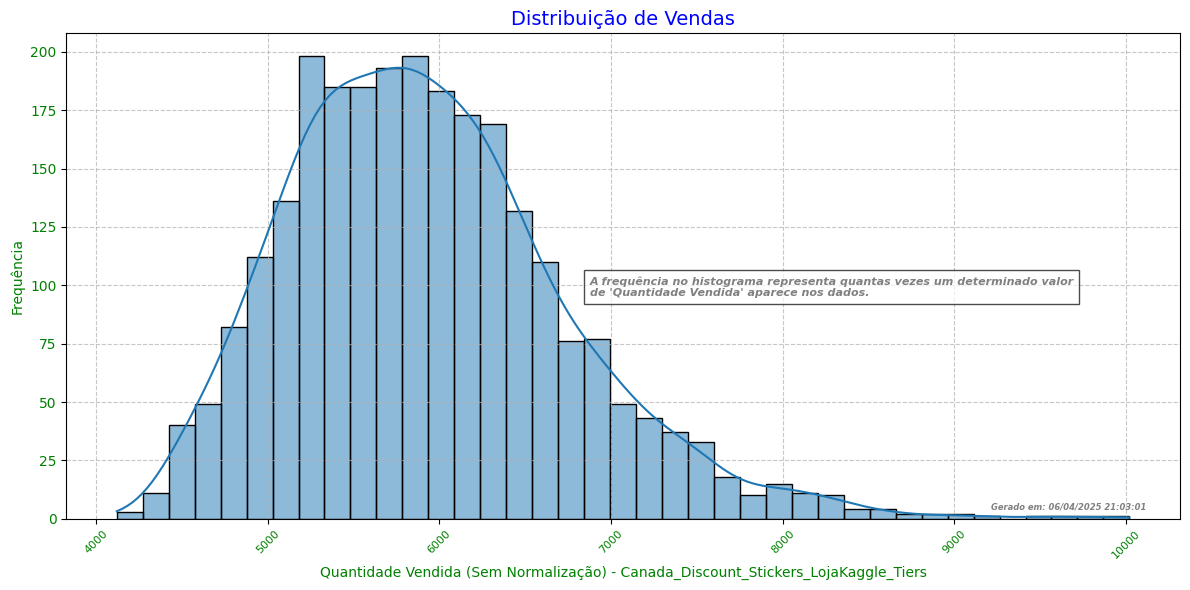

In [107]:
# Gráfico com os valores de vendas versus a sua frenquencia de ocorrência + uma curva da distribuição teórica.
# Criar figura
plt.figure(figsize=(12, 6))

# Plotar histograma com densidade
sns.histplot(df_work['num_sold'], kde=True)

# Adicionar títulos e legendas
plt.title('Distribuição de Vendas', fontsize=14, color='blue')
plt.xlabel('Quantidade Vendida (Sem Normalização) - Canada_Discount_Stickers_LojaKaggle_Tiers', fontsize=10, color='green')
plt.ylabel('Frequência', fontsize=10, color='green')

# Ajustar eixos
plt.xticks(rotation=45, fontsize=8, color='green')
plt.yticks(fontsize=10, color='green')

# Adicionar grade
plt.grid(True, linestyle='--', alpha=0.7)

# Adicionar explicação sobre a frequência
texto_frequencia = "A frequência no histograma representa quantas vezes um determinado valor\n" + \
                   "de 'Quantidade Vendida' aparece nos dados."
plt.text(0.47, 0.5, texto_frequencia, transform=plt.gca().transAxes, fontsize=8,
        fontstyle='italic', fontweight='bold',
         verticalalignment='top', color='gray', bbox=dict(facecolor='white', alpha=0.7))

# Data e hora
data_hora_atual = datetime.now().strftime('%d/%m/%Y %H:%M:%S')
plt.text(0.97, 0.02, f'Gerado em: {data_hora_atual}', horizontalalignment='right',
         transform=plt.gca().transAxes, color = 'gray', fontsize=6, fontstyle='italic', fontweight='bold')

# Pergunta ao usuário sobre exportação
#exportar = input("Deseja exportar o gráfico? (sim/não): ").strip().lower()
exportar = 'nao'
if exportar == 'sim':
    # Gerando o gráfico de exportação automaticamente
    nome_arquivo = f"grafico_vendas_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png"
    plt.savefig(nome_arquivo, dpi=300)
    print(f"Gráfico exportado como '{nome_arquivo}'.")

# Mostrar gráfico
plt.tight_layout()
plt.show()

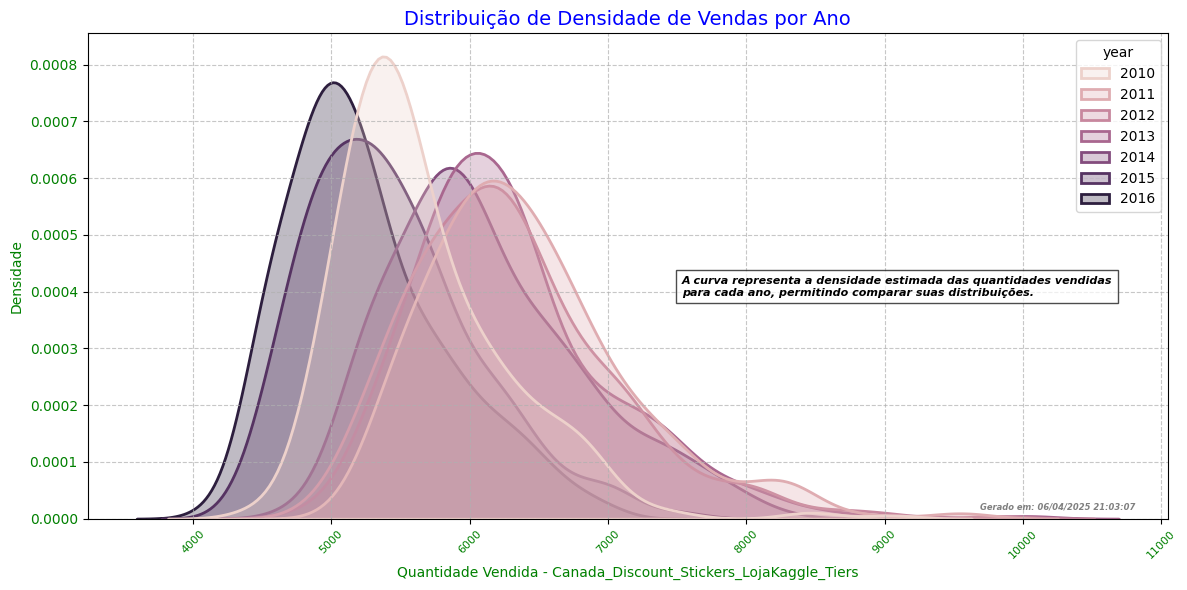

In [108]:
# Gráfico com os valores de vendas versus a sua frenquencia de ocorrência por ano.
# Criar figura
plt.figure(figsize=(12, 6))

# Plotar a densidade de 'num_sold' com separação por ano
sns.kdeplot(data=df_work, x='num_sold', hue='year', fill=True, common_norm=False, alpha=0.3, linewidth=2)

# Adicionar títulos e legendas
plt.title('Distribuição de Densidade de Vendas por Ano', fontsize=14, color='blue')
plt.xlabel('Quantidade Vendida - Canada_Discount_Stickers_LojaKaggle_Tiers', fontsize=10, color='green')
plt.ylabel('Densidade', fontsize=10, color='green')

# Ajustar eixos
plt.xticks(rotation=45, fontsize=8, color='green')
plt.yticks(fontsize=10, color='green')

# Adicionar grade
plt.grid(True, linestyle='--', alpha=0.7)


# Adicionar explicação sobre a densidade
texto_frequencia = "A curva representa a densidade estimada das quantidades vendidas\npara cada ano, permitindo comparar suas distribuições."
plt.text(0.55, 0.5, texto_frequencia, transform=plt.gca().transAxes, fontsize=8,
         fontstyle='italic', fontweight='bold', verticalalignment='top',
         color='black', bbox=dict(facecolor='white', alpha=0.7))

# Data e hora
data_hora_atual = datetime.now().strftime('%d/%m/%Y %H:%M:%S')
plt.text(0.97, 0.02, f'Gerado em: {data_hora_atual}', horizontalalignment='right',
         transform=plt.gca().transAxes, color = 'gray', fontsize=6, fontstyle='italic', fontweight='bold')

# Pergunta ao usuário sobre exportação
#exportar = input("Deseja exportar o gráfico? (sim/não): ").strip().lower()
exportar = 'nao'
if exportar == 'sim':
    # Gerando o gráfico de exportação automaticamente
    nome_arquivo = f"grafico_vendas_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png"
    plt.savefig(nome_arquivo, dpi=300)
    print(f"Gráfico exportado como '{nome_arquivo}'.")

# Mostrar gráfico
plt.tight_layout()
plt.show()

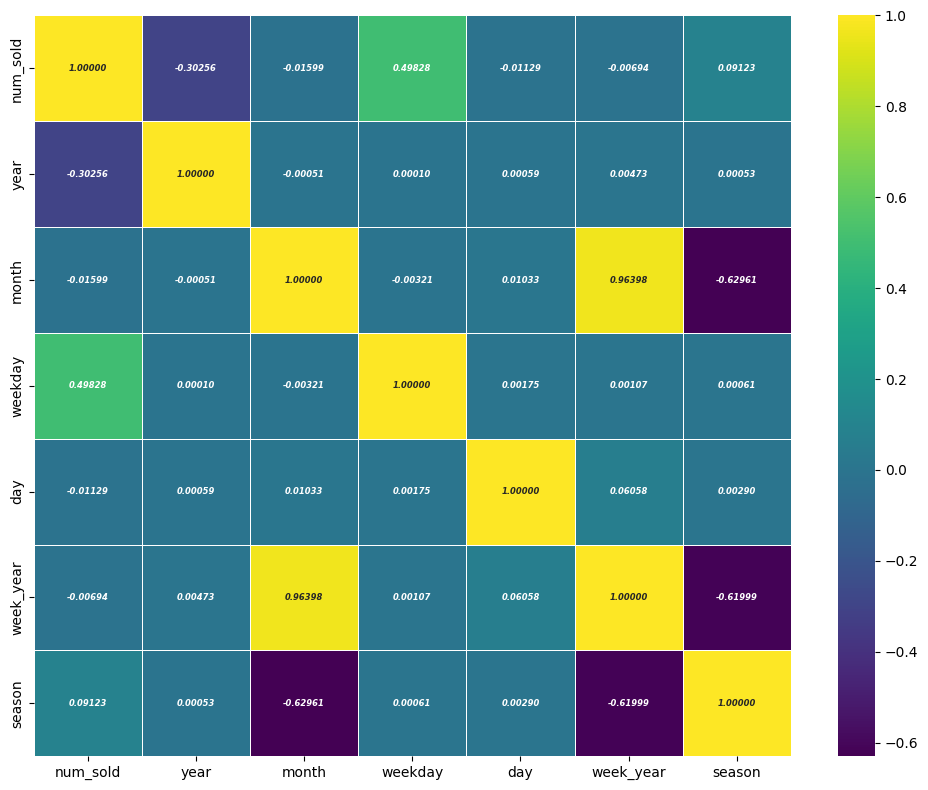

In [109]:
# Matriz de Correlação
plt.figure(figsize=(10, 8))

# Gerando o heatmap com ajustes
sns.heatmap(
    df_work.corr(),
    annot=True,
    cmap=plt.cm.viridis,
    fmt='.5f',
    linewidths=0.5,
    annot_kws={"size": 6, "weight": "bold", "style": "italic"}  # **Negrito e itálico**
)

# Pergunta ao usuário sobre exportação
#exportar = input("Deseja exportar o gráfico? (sim/não): ").strip().lower()
exportar = 'nao'
if exportar == 'sim':
    # Gerando o gráfico de exportação automaticamente
    nome_arquivo = f"correlacao_das_informacoes_vendas_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png"
    plt.savefig(nome_arquivo, dpi=300)
    print(f"Gráfico exportado como '{nome_arquivo}'.")

# Mostrar gráfico
plt.tight_layout()
plt.show()

<Figure size 1500x1500 with 0 Axes>

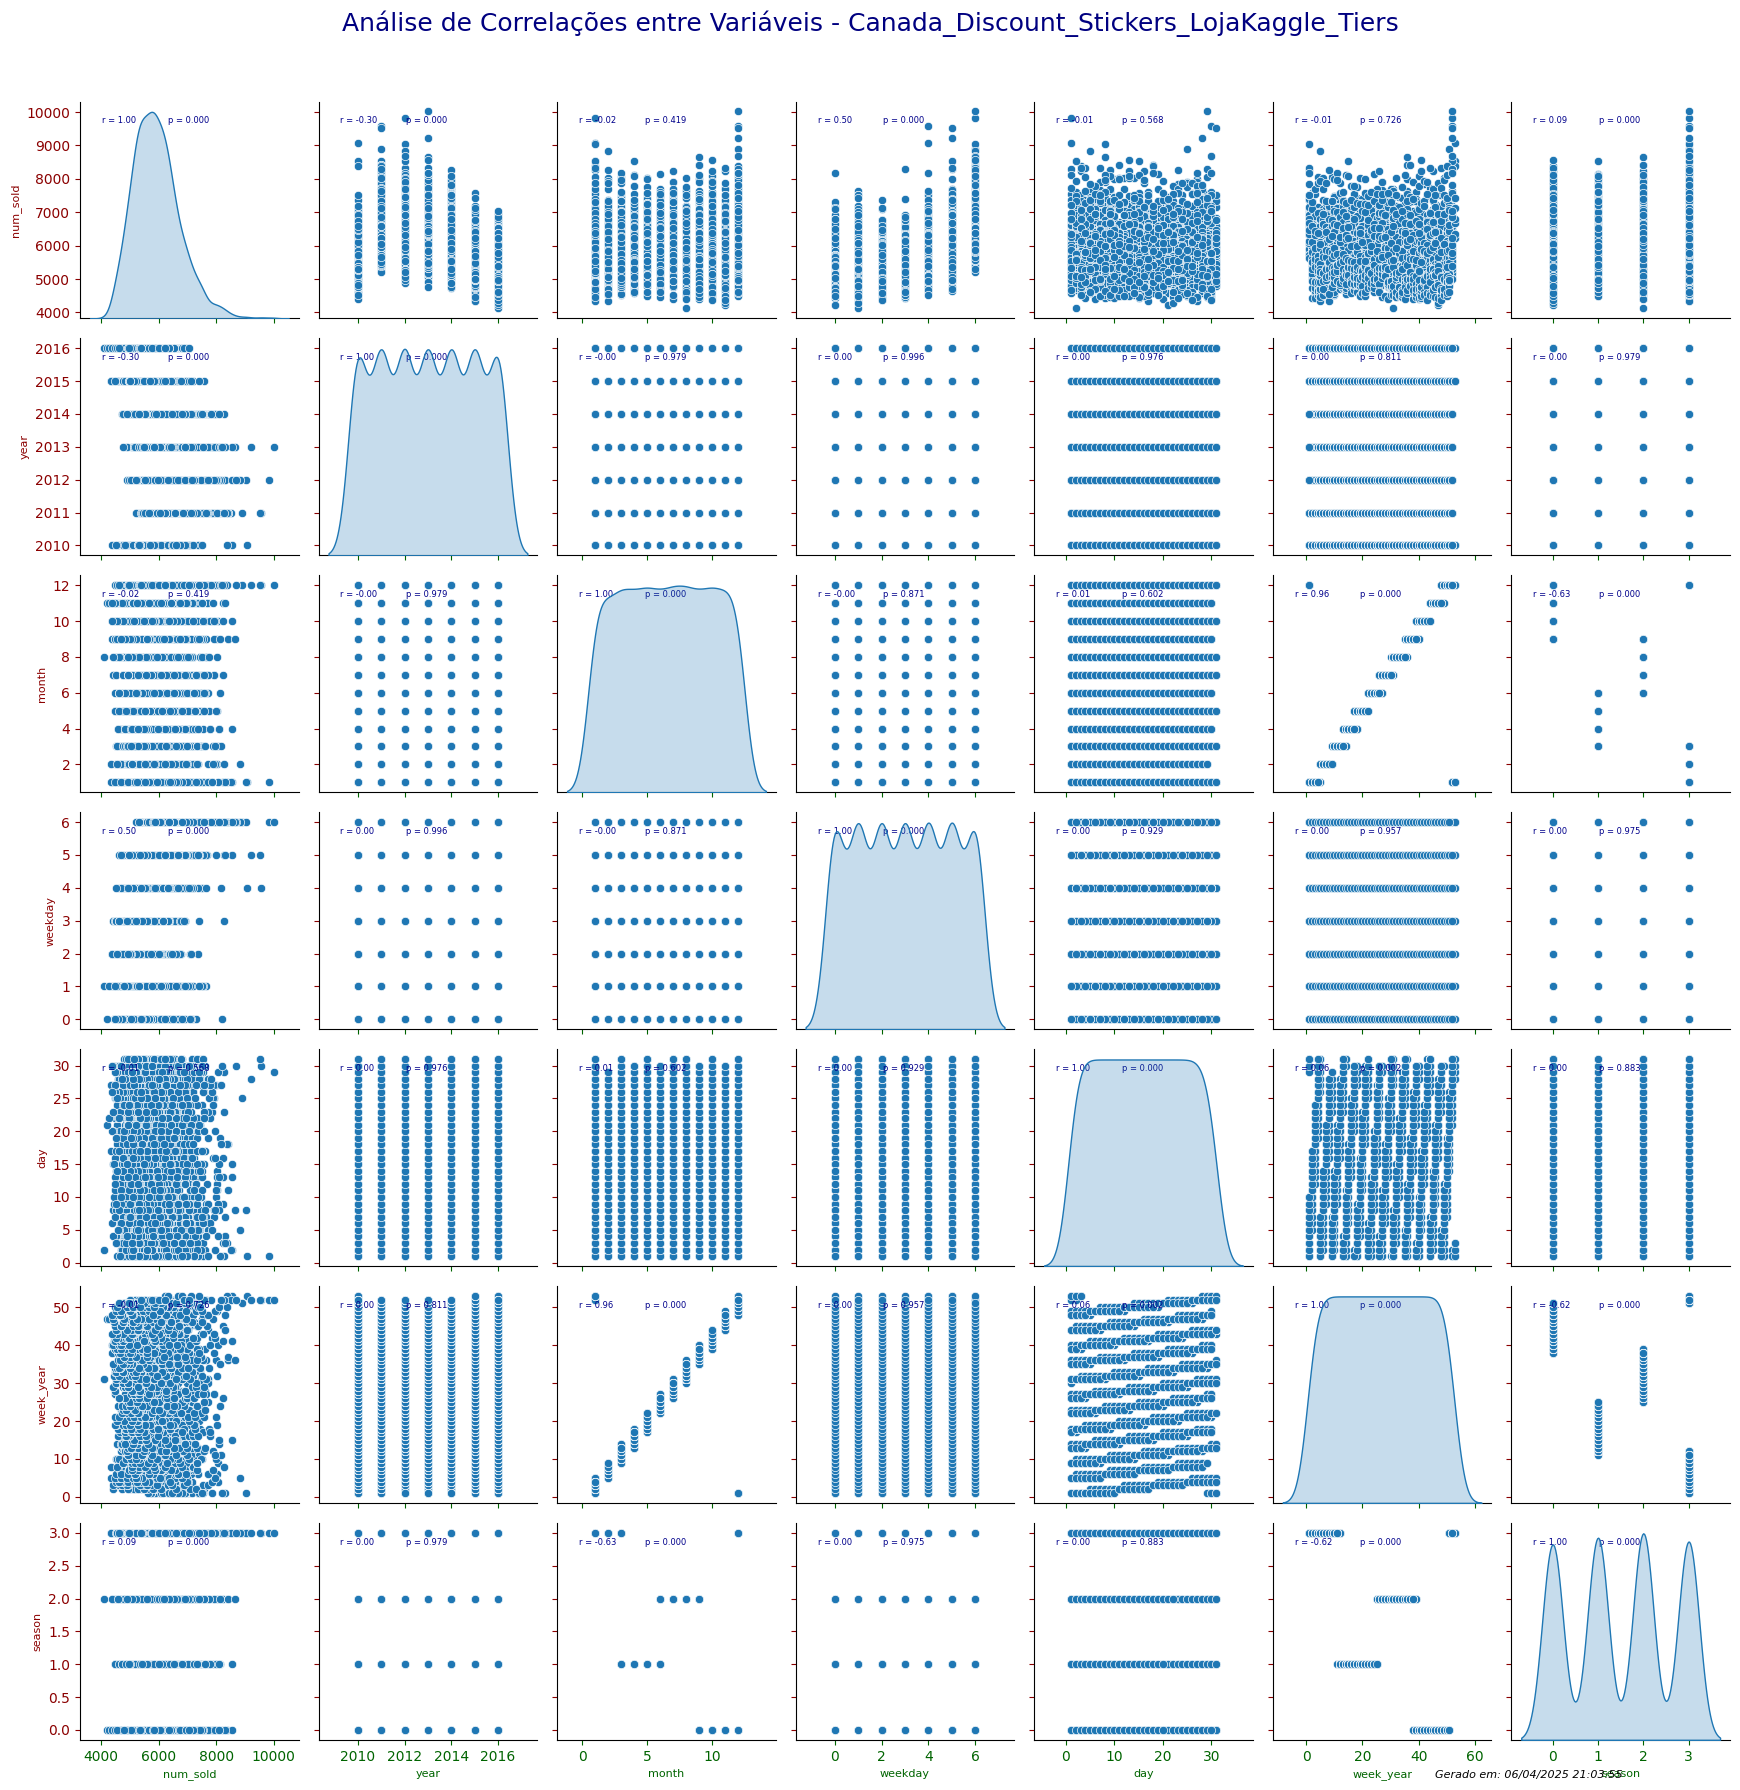

In [111]:
# Mostrando individualmente as correlações de cada informação.
from scipy.stats import pearsonr
# Função para calcular correlação de Pearson e mostrar no gráfico
def corrfunc(x, y, **kws):
    r, p = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(f"r = {r:.2f}", xy=(.1, .9), xycoords=ax.transAxes, fontsize=6, color='darkblue')
    ax.annotate(f"p = {p:.3f}", xy=(.4, .9), xycoords=ax.transAxes, fontsize=6, color='darkblue')

    ax.xaxis.label.set_size(8)
    ax.yaxis.label.set_size(8)
    ax.xaxis.label.set_size(8)
    ax.yaxis.label.set_size(8)


# Criar Pairplot com curvas KDE na diagonal
plt.figure(figsize=(15, 15))
graph = sns.pairplot(df_work, diag_kind="kde", corner=False)
graph.map(corrfunc)

# Título geral e subtítulo
plt.suptitle("Análise de Correlações entre Variáveis - Canada_Discount_Stickers_LojaKaggle_Tiers", fontsize=18, color='navy', y=1.02)
#plt.figtext(0.5, 0.95, "Distribuições, dispersões, correlações de Pearson e significância estatística",
#            ha='center', fontsize=12, color='gray')

# Adicionando data e hora no canto inferior direito
data_hora_atual = datetime.now().strftime('%d/%m/%Y %H:%M:%S')
plt.figtext(0.93, 0.01, f"Gerado em: {data_hora_atual}",
            ha='right', fontsize=8, color='black', fontstyle='italic')

# Ajustar as cores dos labels dos eixos X e Y
for ax in graph.axes.flatten():
    if ax is not None:
        ax.xaxis.label.set_color('darkgreen')
        ax.yaxis.label.set_color('darkred')
        ax.tick_params(axis='x', colors='darkgreen')
        ax.tick_params(axis='y', colors='darkred')

# Ajustar layout
plt.tight_layout()
plt.show()

In [127]:
# Procedimento Stepwise - analise quais variaveis devem permancer no modelo pois contem significancia estatistica
# Instalação e carregamento da função 'stepwise' do pacote 'statstests.process'
# Autores do pacote: Helder Prado Santos e Luiz Paulo Fávero
# https://stats-tests.github.io/statstests/

!pip install statstests
from statstests.process import stepwise

# Instalação e carregamento da função para Teste de verificação da
# aderência dos resíduos à normalidade
from scipy.stats import shapiro     # Teste de Shapiro-Wilk (n < 30)
from statstests.tests import shapiro_francia # Teste de Shapiro-Francia (n >= 30)

In [128]:
# Estimando a Regressão Múltipla  --- somente para validar se temos uma distribuição normal
%time
# Criar a string com os nomes das colunas, garantindo que estejam corretamente formatadas
colunas = df_work.columns.difference(['num_sold'])  # Removendo a variável dependente
colunas_formula = ' + '.join(f'Q("{col}")' for col in colunas)  # Q() protege nomes com espaços/especiais

# Criando o modelo OLS
modelo_df_work = sm.OLS.from_formula(f'num_sold ~ {colunas_formula}', df_work).fit()

# Exibir o resumo do modelo
print(modelo_df_work.summary())

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 13.1 µs
                            OLS Regression Results                            
Dep. Variable:               num_sold   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 1.254e+04
Date:                Sun, 06 Apr 2025   Prob (F-statistic):               0.00
Time:                        21:15:50   Log-Likelihood:                -16177.
No. Observations:                2557   AIC:                         3.237e+04
Df Residuals:                    2549   BIC:                         3.242e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [129]:
# Estimação do modelo por meio do procedimento Stepwise
modelo_step_work = stepwise(modelo_df_work, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 num_sold ~ Q('Q("bc_num_sold")') + Q('Q("day")') + Q('Q("month")') + Q('Q("season")') + Q('Q("week_year")') + Q('Q("weekday")') + Q('Q("year")')

 Discarding atribute "Q('Q("day")')" with p-value equal to 0.18523775453828564 

Estimating model...: 
 num_sold ~ Q('Q("bc_num_sold")') + Q('Q("month")') + Q('Q("season")') + Q('Q("week_year")') + Q('Q("weekday")') + Q('Q("year")')

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': 'Q(\'Q("day")\')', 'p-value': 0.18523775453828564}

 Model after stepwise process...: 
 num_sold ~ Q('Q("bc_num_sold")') + Q('Q("month")') + Q('Q("season")') + Q('Q("week_year")') + Q('Q("weekday")') + Q('Q("year")') 

                            OLS Regression Results                            
Dep. Variable:               num_sold   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:      

In [130]:
# Teste de verificação da aderência dos resíduos à normalidade com amostras maior que 30.

# Teste de Shapiro-Wilk (n < 30)
#shapiro(modelo_step_empresas.resid)

# Teste de Shapiro-Francia (n >= 30)
teste_sf = shapiro_francia(modelo_step_work.resid)

# Interpretação
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.6f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.05 #nível de significância
if p[1] > alpha:
	print('Não se rejeita H0 - Distribuição aderente à normalidade')
else:
	print('Rejeita-se H0 - Distribuição não aderente à normalidade')

method  :  Shapiro-Francia normality test
statistics W  :  0.7637772040901261
statistics z  :  14.385189088989428
p-value  :  3.2051333691351005e-47
Statistics W=0.763777, p-value=0.000000
Rejeita-se H0 - Distribuição não aderente à normalidade


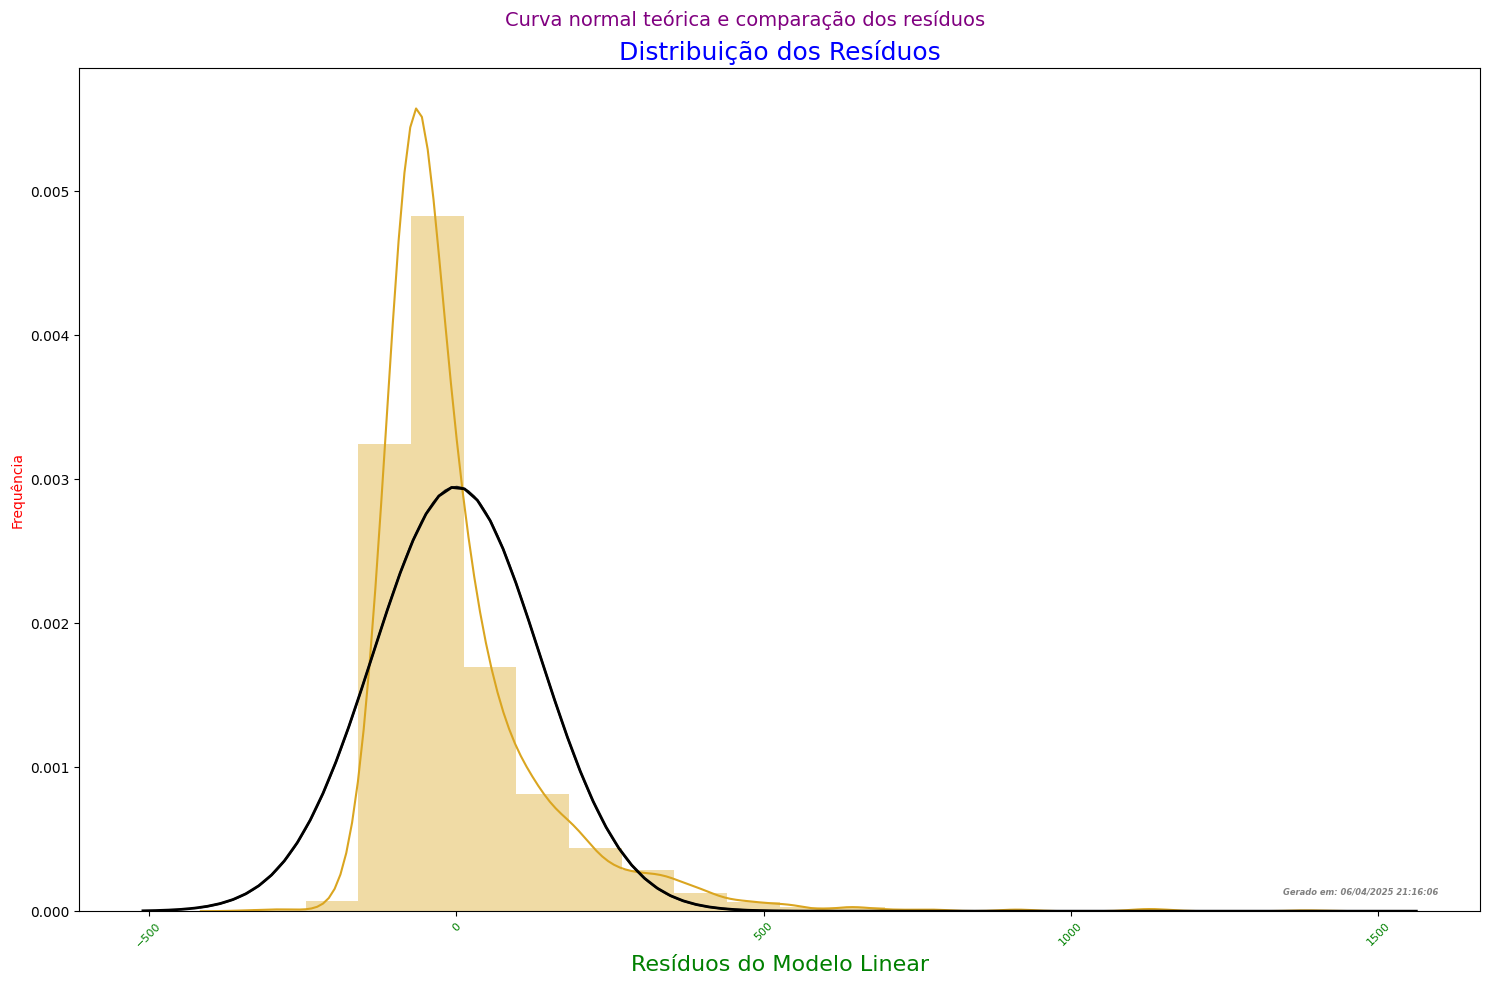

In [131]:
from scipy.stats import norm

# Plotando os resíduos do 'modelo_step_train' e acrescentando uma curva normal teórica
plt.figure(figsize=(15, 10))

# Plotar o gráfico com a distribuição de resíduos e a curva KDE
#sns.histplot(modelo_step_train.resid, kde=True, bins=20, color='goldenrod', stat='density')
sns.distplot(modelo_step_work.resid, fit=norm, kde=True, bins=20, color='goldenrod')

# Gerar os valores da curva normal teórica
xmin, xmax = plt.xlim()  # Definir os limites dos eixos X
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(modelo_step_work.resid), np.std(modelo_step_work.resid))  # Normal teórica

# Plotar a curva normal teórica
plt.plot(x, p, 'k', linewidth=2, label='Curva Normal Teórica')

# Ajustar título e subtítulo com cores diferentes
plt.title('Distribuição dos Resíduos', fontsize=18, color='blue')  # Título principal
plt.suptitle('Curva normal teórica e comparação dos resíduos', fontsize=14, color='purple')  # Subtítulo

# Adicionar legendas nos eixos com formatação específica
plt.xlabel('Resíduos do Modelo Linear', fontsize=16, color='green')  # Eixo X
plt.ylabel('Frequência', fontsize=10, color='red')  # Eixo Y

# Ajustar a rotação dos valores do eixo X
plt.xticks(rotation=45, fontsize=8, color='green')

# Data e hora
data_hora_atual = datetime.now().strftime('%d/%m/%Y %H:%M:%S')
plt.text(0.97, 0.02, f'Gerado em: {data_hora_atual}', horizontalalignment='right',
         transform=plt.gca().transAxes, color = 'gray', fontsize=6, fontstyle='italic', fontweight='bold')

# Pergunta ao usuário sobre exportação
#exportar = input("Deseja exportar o gráfico? (sim/não): ").strip().lower()
exportar = 'nao'
if exportar == 'sim':
    # Gerando o gráfico de exportação automaticamente
    nome_arquivo = f"grafico_vendas_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png"
    plt.savefig(nome_arquivo, dpi=300)
    print(f"Gráfico exportado como '{nome_arquivo}'.")

# Mostrar gráfico
plt.tight_layout()
plt.show()

In [132]:
# Transformação de Box-Cox
#A transformação de Box-Cox é uma técnica estatística utilizada para transformar dados que não seguem uma distribuição normal em uma distribuição mais próxima da normal.
#Ela é especialmente útil para estabilizar a variância e tornar os dados mais adequados para análises estatísticas, como regressões lineares e testes de hipótese.

#Para o cálculo do lambda de Box-Cox
from scipy.stats import boxcox

#'x' é uma variável que traz os valores transformados (Y*)
#'lambda' é o lambda de Box-Cox
x, lmbda = boxcox(df_work['num_sold'])

print("Lambda: ",lmbda)

Lambda:  -0.8617657204139173


In [133]:
# Inserindo o lambda de Box-Cox no dataset para a estimação de um novo modelo
df_work['bc_num_sold'] = x
df_work.head()

,num_sold,year,month,weekday,day,week_year,season,bc_num_sold
0,9060.0,2010,1,4,1,53,3,1.159957
1,8540.0,2010,1,5,2,53,3,1.159933
2,8390.0,2010,1,6,3,53,3,1.159926
3,6090.0,2010,1,0,4,1,3,1.159773
4,6400.0,2010,1,1,5,1,3,1.159799


In [135]:
#Estimando um novo modelo múltiplo com variável dependente transformada por Box-Cox
modelo_bc_work = sm.OLS.from_formula(f'bc_num_sold ~ {colunas_formula}', df_work).fit()
print(modelo_bc_work.summary())

                            OLS Regression Results                            
Dep. Variable:            bc_num_sold   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.968e+19
Date:                Sun, 06 Apr 2025   Prob (F-statistic):               0.00
Time:                        21:16:58   Log-Likelihood:                 69947.
No. Observations:                2557   AIC:                        -1.399e+05
Df Residuals:                    2549   BIC:                        -1.398e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3.457e-12   1.26e-10  

In [136]:
# Aplicando o procedimento Stepwise no 'modelo_bc"
modelo_step_work_bc = stepwise(modelo_bc_work, pvalue_limit=0.05)

# Verificando a normalidade dos resíduos do 'modelo_step_empresas_bc'
# Teste de Shapiro-Francia
shapiro_francia(modelo_step_work_bc.resid)

Regression type: OLS 

Estimating model...: 
 bc_num_sold ~ Q('Q("bc_num_sold")') + Q('Q("day")') + Q('Q("month")') + Q('Q("season")') + Q('Q("week_year")') + Q('Q("weekday")') + Q('Q("year")')

 Discarding atribute "Q('Q("day")')" with p-value equal to 0.9889422155763379 

Estimating model...: 
 bc_num_sold ~ Q('Q("bc_num_sold")') + Q('Q("month")') + Q('Q("season")') + Q('Q("week_year")') + Q('Q("weekday")') + Q('Q("year")')

 Discarding atribute "Q('Q("season")')" with p-value equal to 0.9981302063172148 

Estimating model...: 
 bc_num_sold ~ Q('Q("bc_num_sold")') + Q('Q("month")') + Q('Q("week_year")') + Q('Q("weekday")') + Q('Q("year")')

 Discarding atribute "Q('Q("weekday")')" with p-value equal to 0.9992404513232913 

Estimating model...: 
 bc_num_sold ~ Q('Q("bc_num_sold")') + Q('Q("month")') + Q('Q("week_year")') + Q('Q("year")')

 Discarding atribute "Q('Q("week_year")')" with p-value equal to 0.9951959667552611 

Estimating model...: 
 bc_num_sold ~ Q('Q("bc_num_sold")') + Q

{'method': 'Shapiro-Francia normality test',
 'statistics W': np.float64(0.9271377637172402),
 'statistics z': np.float64(11.525889287422197),
 'p-value': np.float64(4.8849098263877265e-31)}

In [137]:
# Interpretação
teste_sf = shapiro_francia(modelo_step_work_bc.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.05 #nível de significância
if p[1] > alpha:
	print('Não se rejeita H0 - Distribuição aderente à normalidade')
else:
	print('Rejeita-se H0 - Distribuição não aderente à normalidade')

method  :  Shapiro-Francia normality test
statistics W  :  0.9271377637172402
statistics z  :  11.525889287422197
p-value  :  4.8849098263877265e-31
Statistics W=0.92714, p-value=0.000000
Rejeita-se H0 - Distribuição não aderente à normalidade




---


#5. Criando Modelos usando os dados de trabalho (df_work)

In [166]:
# Splitting the Dataset
X = df_work.drop(['num_sold','bc_num_sold'], axis=1) # Features (independent variables)
y = df_work['num_sold'] # Target variable (dependent variable)

# Splitting the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split( X, y,  test_size=0.2, random_state=42)

# Display the shapes of the training and validation sets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2045, 6) (2045,)
(512, 6) (512,)


In [168]:
# Lista de modelos
models = [
    ('LinearRegression', LinearRegression()),
    ('DecisionTreeRegressor', DecisionTreeRegressor(random_state=42)),
    ('RandomForestRegressor', RandomForestRegressor(random_state=42)),
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('GradientBoostingRegressor', GradientBoostingRegressor(random_state=42)),
    ('XGBRegressor', XGBRegressor(random_state=42)),
    ('AdaBoostRegressor', AdaBoostRegressor(random_state=42)),
]

# Função para treinar e avaliar os modelos
def train_and_evaluate(models, X_train, Y_train, X_test, y_test):
    results = []
    predictions = {}  # Dicionário para armazenar as previsões dos modelos

    for name, model in models:
        model.fit(X_train, Y_train)   # treinando o modelo (0.80)
        y_pred = model.predict(X_test)    # previsões no conjunto de teste (0.20)

        # Avaliação do modelo
        mse = mean_squared_error(y_test, y_pred)
        #rmse =  mean_squared_error(y_test, y_pred, squared=False)
        rmse = np.sqrt(mse)     # RMSE (calculado manualmente)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)

        results.append([name, mse, rmse, mae, r2, mape])
        predictions[name] = y_pred  # Armazena as previsões do modelo

        #print(f"{name} -> MSE: {mse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}, MAPE: {mape:.5f}%")

    # Criando DataFrame de resultados
    results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'RMSE', 'MAE', 'R²', 'MAPE'])

    # Ordenando os resultados pelo MAPE (menor para maior)
    results_df_sorted = results_df.sort_values(by='MAPE', ascending=True)

    # Selecionando os 3 melhores modelos com menor MAPE
    top_3_models = results_df_sorted.head(3)

    return results_df_sorted, top_3_models, predictions

# Executando a função da aplicação do modelos
results_df_sorted, top_3_models, predictions = train_and_evaluate(models, X_train, y_train, X_test, y_test)

# Criação dos DataFrames com os resultados
df_resultados = results_df_sorted
df_top3 = pd.DataFrame(top_3_models)
df_predicoes = pd.DataFrame(predictions)

top_3_names = top_3_models['Model'].tolist()  # Corrigido aqui

df_comparando_y = pd.DataFrame({'y_test': y_test})  # Adiciona os valores reais
for model_name in top_3_names:
    df_comparando_y[model_name + "_pred"] = predictions[model_name]  # Adiciona previsões dos top 3 modelos

df_resultados

,Model,MSE,RMSE,MAE,R²,MAPE
5,XGBRegressor,136584.930554,369.573985,287.131972,0.761040,0.048269
2,RandomForestRegressor,139313.147754,373.246765,294.525586,0.756266,0.049271
4,GradientBoostingRegressor,148761.668599,385.696342,306.900953,0.739736,0.051448
1,DecisionTreeRegressor,229777.148438,479.350757,381.425781,0.597996,0.063854
6,AdaBoostRegressor,230324.197614,479.921033,385.378744,0.597039,0.065549
3,KNeighborsRegressor,352126.289062,593.402300,477.253906,0.383942,0.079975
0,LinearRegression,363341.130843,602.777845,478.394694,0.364321,0.080550


In [169]:
df_top3

,Model,MSE,RMSE,MAE,R²,MAPE
5,XGBRegressor,136584.930554,369.573985,287.131972,0.761040,0.048269
2,RandomForestRegressor,139313.147754,373.246765,294.525586,0.756266,0.049271
4,GradientBoostingRegressor,148761.668599,385.696342,306.900953,0.739736,0.051448


In [170]:
df_predicoes

,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,KNeighborsRegressor,GradientBoostingRegressor,XGBRegressor,AdaBoostRegressor
0,4858.739378,4480.0,4558.6,5226.0,4823.856597,4563.660156,5100.943396
1,5897.529214,5620.0,5718.3,5976.0,5951.277602,5610.393555,6121.417476
2,5965.062398,5640.0,5465.6,5488.0,5421.988413,5262.329590,5608.703704
3,6627.947551,6380.0,6333.2,6706.0,6351.521089,6318.901855,6256.250000
4,6466.238240,7700.0,7479.3,5926.0,7247.142875,7263.941406,7233.183099
...,...,...,...,...,...,...,...
507,5617.908117,4690.0,5165.3,5898.0,5142.888092,4944.320312,5608.703704
508,5443.771981,6030.0,6181.1,5624.0,5930.547294,6254.961426,5910.846024
509,6169.755950,5710.0,5981.3,6880.0,5975.223849,6585.815918,6466.226415
510,5843.343747,5180.0,5401.2,5554.0,5789.489128,5735.619141,5904.422188


In [171]:
# Apresenta os resulatdo do y_predito para os 3 melhores modelos.
df_comparando_y.sample(5)

,y_test,XGBRegressor_pred,RandomForestRegressor_pred,GradientBoostingRegressor_pred
518,6880.0,6253.517090,6371.0,6277.779519
1190,6110.0,5957.723145,6301.2,6303.439301
618,8400.0,7962.446289,7890.6,7633.188333
900,5960.0,6026.370117,6076.3,5984.393483
2161,4960.0,5864.107910,5518.9,5134.355965


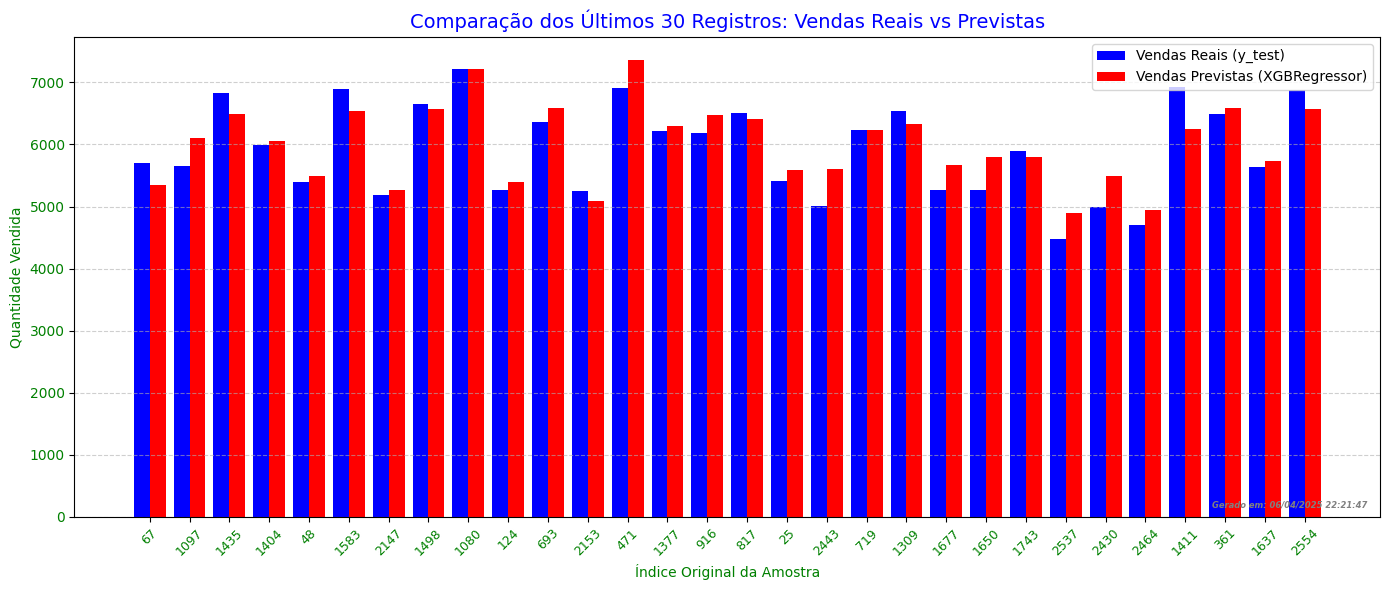

In [210]:
# Apresentando o comparativo real verus previsto dos ultimos 30 eventos.

# Selecionar as últimas 30 linhas (sem resetar o índice)
df_ultimos30 = df_comparando_y.tail(30)

# Criar figura
plt.figure(figsize=(14, 6))

# Largura das barras e posição no eixo X
largura_barra = 0.4
indices = np.arange(len(df_ultimos30))

# Barras de Vendas Reais
plt.bar(indices - largura_barra/2, df_ultimos30['y_test'], width=largura_barra,
        label='Vendas Reais (y_test)', color='blue')

# Barras de Vendas Previstas
plt.bar(indices + largura_barra/2, df_ultimos30['XGBRegressor_pred'], width=largura_barra,
        label='Vendas Previstas (XGBRegressor)', color='red')

# Títulos e eixos
plt.title('Comparação dos Últimos 30 Registros: Vendas Reais vs Previstas', fontsize=14, color='blue')
plt.xlabel('Índice Original da Amostra', fontsize=10, color='green')
plt.ylabel('Quantidade Vendida', fontsize=10, color='green')
plt.xticks(indices, labels=df_ultimos30.index, rotation=45, fontsize=9, color='green')
plt.yticks(fontsize=10, color='green')

# Legenda
plt.legend(fontsize=10)

# Grade e explicação
plt.grid(True, linestyle='--', alpha=0.6, axis='y')

#plt.text(0.01, 0.95,
#         "Barras azuis: Vendas reais.\nBarras vermelhas: Previsões do modelo.",
#         transform=plt.gca().transAxes,
#         fontsize=9, fontstyle='italic', bbox=dict(facecolor='white', alpha=0.6), color='gray')

# Inserir data/hora do gráfico
data_hora_atual = datetime.now().strftime('%d/%m/%Y %H:%M:%S')
plt.text(0.99, 0.02, f'Gerado em: {data_hora_atual}', horizontalalignment='right',
         transform=plt.gca().transAxes, color='gray', fontsize=6, fontstyle='italic', fontweight='bold')

# Pergunta ao usuário sobre exportação
#exportar = input("Deseja exportar o gráfico? (sim/não): ").strip().lower()
exportar = 'nao'
if exportar == 'sim':
    # Gerando o gráfico de exportação automaticamente
    nome_arquivo = f"grafico_vendas_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png"
    plt.savefig(nome_arquivo, dpi=300)
    print(f"Gráfico exportado como '{nome_arquivo}'.")

# Mostrar gráfico
plt.tight_layout()
plt.show()

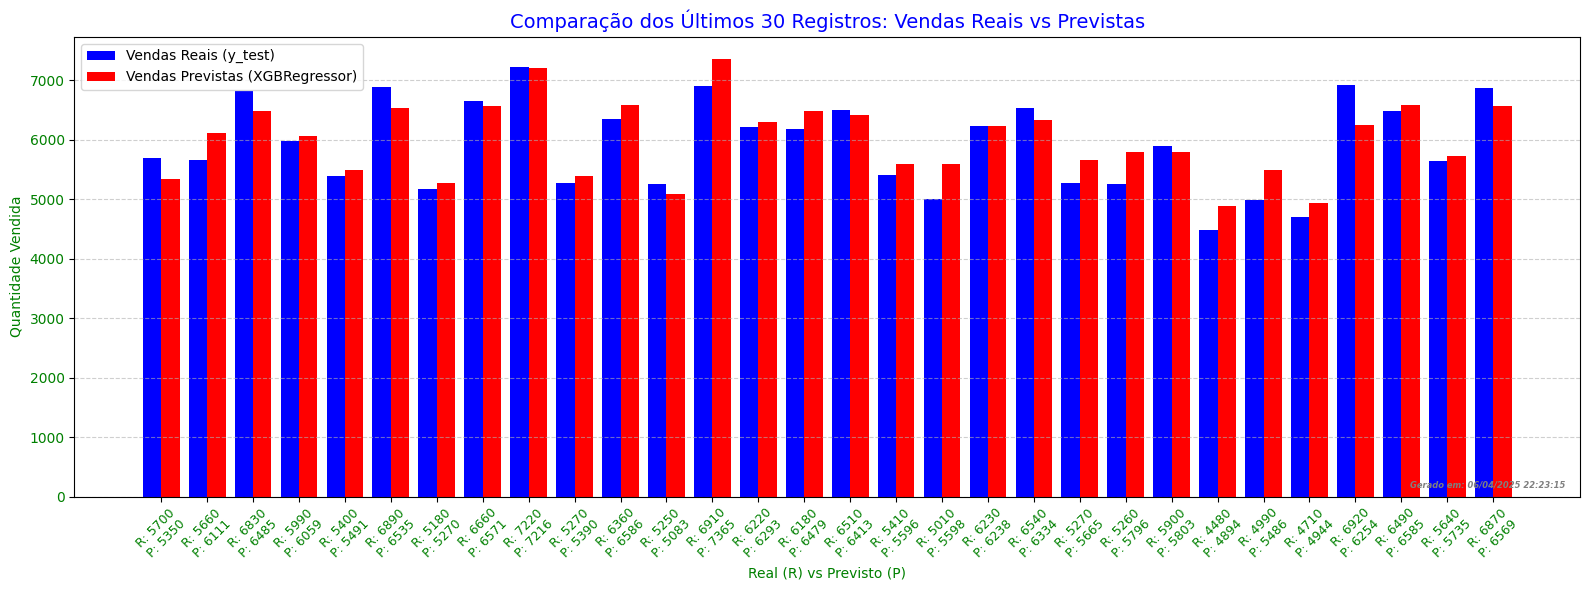

In [212]:
# Apresentando o comparativo real verus previsto dos ultimos 30 eventos.

# Selecionar as últimas 30 linhas (sem resetar o índice)
df_ultimos30 = df_comparando_y.tail(30)

# Criar figura
plt.figure(figsize=(16, 6))

# Largura das barras e posição no eixo X
largura_barra = 0.4
indices = np.arange(len(df_ultimos30))

# Barras de Vendas Reais
plt.bar(indices - largura_barra/2, df_ultimos30['y_test'], width=largura_barra,
        label='Vendas Reais (y_test)', color='blue')

# Barras de Vendas Previstas
plt.bar(indices + largura_barra/2, df_ultimos30['XGBRegressor_pred'], width=largura_barra,
        label='Vendas Previstas (XGBRegressor)', color='red')

# Criar rótulos personalizados para o eixo X com valores reais e previstos
labels_personalizados = [
    f"R: {int(real)}\nP: {int(prev)}"
    for real, prev in zip(df_ultimos30['y_test'], df_ultimos30['XGBRegressor_pred'])
]

# Títulos e eixos
plt.title('Comparação dos Últimos 30 Registros: Vendas Reais vs Previstas', fontsize=14, color='blue')
plt.xlabel('Real (R) vs Previsto (P)', fontsize=10, color='green')
plt.ylabel('Quantidade Vendida', fontsize=10, color='green')
plt.xticks(indices, labels=labels_personalizados, rotation=45, fontsize=9, color='green')
plt.yticks(fontsize=10, color='green')

# Legenda
plt.legend(fontsize=10)

# Grade
plt.grid(True, linestyle='--', alpha=0.6, axis='y')

# Inserir data/hora do gráfico
data_hora_atual = datetime.now().strftime('%d/%m/%Y %H:%M:%S')
plt.text(0.99, 0.02, f'Gerado em: {data_hora_atual}', horizontalalignment='right',
         transform=plt.gca().transAxes, color='gray', fontsize=6, fontstyle='italic', fontweight='bold')

# Mostrar gráfico
plt.tight_layout()
plt.show()




---


#6. Aplicando o modelo nos dados de testes (df_work_test)   

Aplicada a predição para esta base

Preparando a base de dados

In [219]:
# Define o caminho do arquivo dentro da subpasta "Datasets"
caminho_arquivo = os.path.join("DataSets", "test_Canada_Discount_Stickers_LojaKaggle_Tiers.csv")

# Abertura do arquivo
df_work_test = pd.read_csv(caminho_arquivo, sep=",")

# Visualiza as primeiras linhas
df_work_test.head()

,id,date,country,store,product
0,230132,01/01/2017,Canada,Discount Stickers,Kaggle Tiers
1,230222,02/01/2017,Canada,Discount Stickers,Kaggle Tiers
2,230312,03/01/2017,Canada,Discount Stickers,Kaggle Tiers
3,230402,04/01/2017,Canada,Discount Stickers,Kaggle Tiers
4,230492,05/01/2017,Canada,Discount Stickers,Kaggle Tiers


Tratamento para a sazonalidade nos dados de venda

In [220]:
# Aplicar tratamento de separação de datas
df_work_test = extrair_informacoes_data(df_work_test)
df_work_test.head()

,id,date,country,store,product,year,month,weekday,day,week_year
0,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers,2017,1,6,1,52
1,230222,2017-01-02,Canada,Discount Stickers,Kaggle Tiers,2017,1,0,2,1
2,230312,2017-01-03,Canada,Discount Stickers,Kaggle Tiers,2017,1,1,3,1
3,230402,2017-01-04,Canada,Discount Stickers,Kaggle Tiers,2017,1,2,4,1
4,230492,2017-01-05,Canada,Discount Stickers,Kaggle Tiers,2017,1,3,5,1


In [221]:
# Função para identificar a estação do ano no país: Canadá   (função criada anteriormente)
# Cria uma nova coluna com estação
seasons = []
for i in range(len(df_work_test)):
    mes = df_work_test.loc[i, 'month']
    dia = df_work_test.loc[i, 'day']
    estacao = estacao_canada(mes, dia)
    seasons.append(estacao)

# Adiciona a coluna no dataframe
df_work_test['season'] = seasons

# Apresentando os novos dados
df_work_test.head()

,id,date,country,store,product,year,month,weekday,day,week_year,season
0,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers,2017,1,6,1,52,Winter
1,230222,2017-01-02,Canada,Discount Stickers,Kaggle Tiers,2017,1,0,2,1,Winter
2,230312,2017-01-03,Canada,Discount Stickers,Kaggle Tiers,2017,1,1,3,1,Winter
3,230402,2017-01-04,Canada,Discount Stickers,Kaggle Tiers,2017,1,2,4,1,Winter
4,230492,2017-01-05,Canada,Discount Stickers,Kaggle Tiers,2017,1,3,5,1,Winter


In [222]:
# Tratando as informações categóricas (transformando para Dummies)  - LabelEnconder definido anteriormente
# Aplica fit_transform em cada coluna
for col in categoricas:
    df_work_test[col] = label_encoder.fit_transform(df_work_test[col])

df_work_test.head()

,id,date,country,store,product,year,month,weekday,day,week_year,season
0,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers,2017,1,6,1,52,3
1,230222,2017-01-02,Canada,Discount Stickers,Kaggle Tiers,2017,1,0,2,1,3
2,230312,2017-01-03,Canada,Discount Stickers,Kaggle Tiers,2017,1,1,3,1,3
3,230402,2017-01-04,Canada,Discount Stickers,Kaggle Tiers,2017,1,2,4,1,3
4,230492,2017-01-05,Canada,Discount Stickers,Kaggle Tiers,2017,1,3,5,1,3


In [223]:
# Apagando as colunas que não serão necessárias para análise do modelo
# Drop id and date column from dataset
df_work_test = df_work_test.drop(columns=['date', 'id', 'country', 'store', 'product'])
df_work_test.head()

,year,month,weekday,day,week_year,season
0,2017,1,6,1,52,3
1,2017,1,0,2,1,3
2,2017,1,1,3,1,3
3,2017,1,2,4,1,3
4,2017,1,3,5,1,3


In [225]:
# Selecionar o melhor modelo (menor MAPE) e aplicando para a base de testes
best_model_name = results_df_sorted.iloc[0]['Model']
best_model = [m for name, m in models if name == best_model_name][0]  # Recupera o modelo pelo nome

# Aplicar o melhor modelo ao conjunto de teste completo (df_test_full)
X_test_full = df_work_test.drop(columns=['num_sold'], errors='ignore')  # Usa apenas as features

# Gerando previsões
y_test_full_pred = best_model.predict(X_test_full)

# Adicionando a predição ao DataFrame
df_test_result = df_work_test.copy()
df_test_result['num_sold_predict'] = y_test_full_pred

# Gerar nome de arquivo com timestamp
#file_name = f'resultado_predicoes_{gerar_timestamp()}.csv'

# Salvar como CSV
#df_test_result.to_csv(file_name, index=False)

#print(f"Submission file created successfully using the best model: {best_model_name} - Name: {file_name}")
df_test_result.head()

,year,month,weekday,day,week_year,season,num_sold_predict
0,2017,1,6,1,52,3,6886.935547
1,2017,1,0,2,1,3,6020.796875
2,2017,1,1,3,1,3,5980.062500
3,2017,1,2,4,1,3,5691.360352
4,2017,1,3,5,1,3,5958.071777


#9 - Gerando e preparando dados ficticios para predição




In [288]:
# Certifique-se de que a coluna de data no df_test_result esteja em formato datetime
df_test_result['date'] = pd.to_datetime(df_test_result[['year', 'month', 'day']])

# Pegar a última data presente no df_test_result
ultima_data = df_test_result['date'].max()

# Gerar as próximas 30 datas a partir da última data
datas_futuras = pd.date_range(start=ultima_data + pd.Timedelta(days=1), periods=30)

# Criar DataFrame com a coluna 'date'
df_future = pd.DataFrame({'date': datas_futuras})

# Formatando a data para string no formato 'dd/mm/yyyy' (se necessário)
df_future['date_str'] = df_future['date'].dt.strftime('%d/%m/%Y')

# Extraindo partes da data
df_future['year'] = df_future['date'].dt.year
df_future['month'] = df_future['date'].dt.month
df_future['weekday'] = df_future['date'].dt.weekday
df_future['day'] = df_future['date'].dt.day
df_future['week_year'] = df_future['date'].dt.isocalendar().week

# Visualização opcional
df_future.head()


,date,date_str,year,month,weekday,day,week_year
0,2020-01-01,01/01/2020,2020,1,2,1,1
1,2020-01-02,02/01/2020,2020,1,3,2,1
2,2020-01-03,03/01/2020,2020,1,4,3,1
3,2020-01-04,04/01/2020,2020,1,5,4,1
4,2020-01-05,05/01/2020,2020,1,6,5,1


In [256]:
# Gerando dados fictícos para usar como predição para o futuro.
hoje = datetime.today()     # data de hoje
datas_futuras = pd.date_range(start=hoje, periods=30)    # Lista de datas para os próximos 30 dias

# Criando DataFrame base com a coluna 'date'
df_future = pd.DataFrame({'date': datas_futuras})

# Formatando a data para string no formato 'dd/mm/yyyy'
df_future['date'] = df_future['date'].dt.strftime('%d/%m/%Y')

# Extraindo informações (reconvertendo a coluna para datetime só para extrair partes da data)
df_future['year'] = pd.to_datetime(df_future['date'], format='%d/%m/%Y').dt.year
df_future['month'] = pd.to_datetime(df_future['date'], format='%d/%m/%Y').dt.month
df_future['weekday'] = pd.to_datetime(df_future['date'], format='%d/%m/%Y').dt.weekday
df_future['day'] = pd.to_datetime(df_future['date'], format='%d/%m/%Y').dt.day
df_future['week_year'] = pd.to_datetime(df_future['date'], format='%d/%m/%Y').dt.isocalendar().week


In [290]:
df_future.head()

,date,date_str,year,month,weekday,day,week_year
0,2020-01-01,01/01/2020,2020,1,2,1,1
1,2020-01-02,02/01/2020,2020,1,3,2,1
2,2020-01-03,03/01/2020,2020,1,4,3,1
3,2020-01-04,04/01/2020,2020,1,5,4,1
4,2020-01-05,05/01/2020,2020,1,6,5,1


In [291]:
# Cria uma nova coluna com estação
seasons = []
for i in range(len(df_future)):
    mes = df_future.loc[i, 'month']
    dia = df_future.loc[i, 'day']
    estacao = estacao_canada(mes, dia)
    seasons.append(estacao)

# Adiciona a coluna no dataframe
df_future['season'] = seasons

# Apresentando os novos dados
df_future.head()

,date,date_str,year,month,weekday,day,week_year,season
0,2020-01-01,01/01/2020,2020,1,2,1,1,Winter
1,2020-01-02,02/01/2020,2020,1,3,2,1,Winter
2,2020-01-03,03/01/2020,2020,1,4,3,1,Winter
3,2020-01-04,04/01/2020,2020,1,5,4,1,Winter
4,2020-01-05,05/01/2020,2020,1,6,5,1,Winter


In [292]:
# Tratando as informações categóricas (transformando para Dummies)

# Aplica fit_transform em cada coluna
for col in categoricas:
    df_future[col] = label_encoder.fit_transform(df_future[col])

df_future.head()

,date,date_str,year,month,weekday,day,week_year,season
0,2020-01-01,01/01/2020,2020,1,2,1,1,0
1,2020-01-02,02/01/2020,2020,1,3,2,1,0
2,2020-01-03,03/01/2020,2020,1,4,3,1,0
3,2020-01-04,04/01/2020,2020,1,5,4,1,0
4,2020-01-05,05/01/2020,2020,1,6,5,1,0


In [293]:
# Aplicando o modelo para os dados novos

# Alinhar as colunas do df_future com o modelo (X_train)
missing_cols = set(X_train.columns) - set(df_future.columns)
for col in missing_cols:
    df_future[col] = 0
df_future = df_future[X_train.columns]

df_future['num_sold'] = best_model.predict(df_future)     #Prever com o modelo

df_future.to_csv(f'previsao_mes_atual_{gerar_timestamp()}.csv', index=False)    #Salvar resultado

print(df_future[['num_sold']].head())    # Exibir resultado

      num_sold
0  5759.171387
1  5596.506836
2  6203.166504
3  6583.379395
4  6514.515137


In [294]:
# Criando o campo data para o novo arquivo
df_future['date'] = pd.to_datetime(df_future[['year', 'month', 'day']])
df_future.head()

,year,month,weekday,day,week_year,season,num_sold,date
0,2020,1,2,1,1,0,5759.171387,2020-01-01
1,2020,1,3,2,1,0,5596.506836,2020-01-02
2,2020,1,4,3,1,0,6203.166504,2020-01-03
3,2020,1,5,4,1,0,6583.379395,2020-01-04
4,2020,1,6,5,1,0,6514.515137,2020-01-05


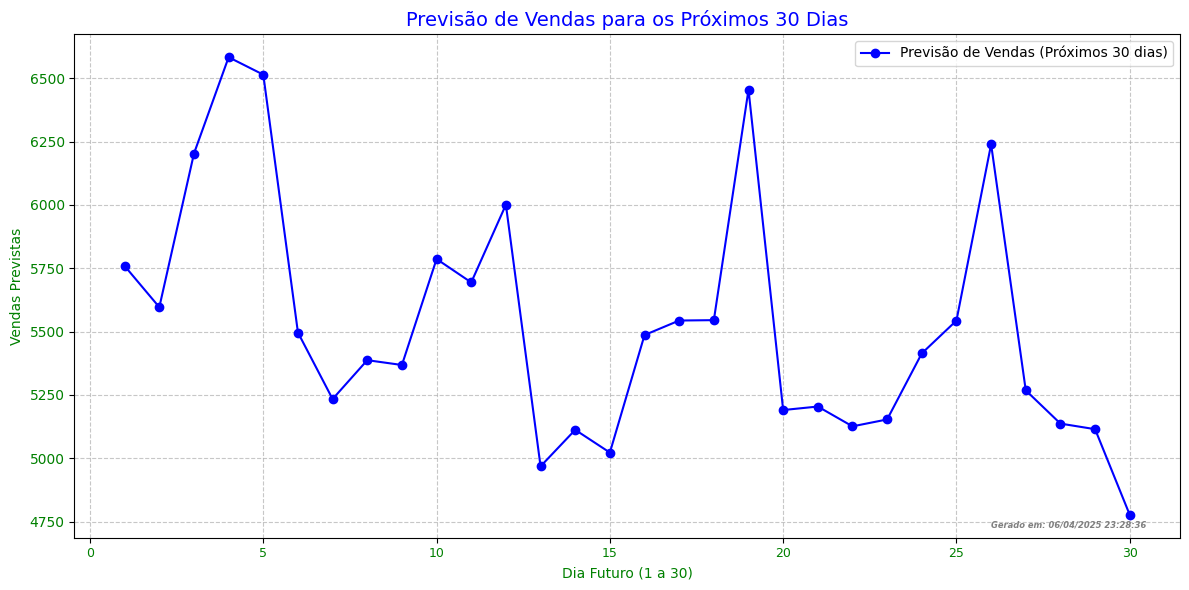

In [295]:
# Demonstrando os valores gerados

# Criar figura
plt.figure(figsize=(12, 6))

# Plotar linha com marcadores
plt.plot(range(1, 31), df_future['num_sold'], marker='o', linestyle='-', color='blue',
         label='Previsão de Vendas (Próximos 30 dias)')

# Título e eixos
plt.title('Previsão de Vendas para os Próximos 30 Dias', fontsize=14, color='blue')
plt.xlabel('Dia Futuro (1 a 30)', fontsize=10, color='green')
plt.ylabel('Vendas Previstas', fontsize=10, color='green')

# Ajustar ticks
plt.xticks(fontsize=9, color='green')
plt.yticks(fontsize=10, color='green')

# Grade
plt.grid(True, linestyle='--', alpha=0.7)

# Legenda
plt.legend(fontsize=10)

# Texto explicativo
#plt.text(0.47, 0.55,
#         "Previsão baseada em modelo de séries temporais.\n\n"
#         "Observe o comportamento da tendência para ajustar decisões de demanda.",
#         transform=plt.gca().transAxes,
#         fontsize=8, fontstyle='italic', fontweight='bold',
#         bbox=dict(facecolor='white', alpha=0.7), color='gray')

# Data e hora do gráfico
data_hora_atual = datetime.now().strftime('%d/%m/%Y %H:%M:%S')
plt.text(0.97, 0.02, f'Gerado em: {data_hora_atual}', horizontalalignment='right',
         transform=plt.gca().transAxes, color='gray', fontsize=6, fontstyle='italic', fontweight='bold')

# Exportação (manual)
exportar = 'nao'
if exportar == 'sim':
    nome_arquivo = f"grafico_previsao_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png"
    plt.savefig(nome_arquivo, dpi=300)
    print(f"Gráfico exportado como '{nome_arquivo}'.")

# Mostrar gráfico
plt.tight_layout()
plt.show()


#10. Prepando apresentação final

In [297]:
# Criando nova coluna colunas 'year', 'month' e 'day'
df_test_result['date'] = pd.to_datetime(df_test_result[['year', 'month', 'day']])
df_test_result.head()

,year,month,weekday,day,week_year,season,num_sold,date
0,2017,1,6,1,52,3,6886.935547,2017-01-01
1,2017,1,0,2,1,3,6020.796875,2017-01-02
2,2017,1,1,3,1,3,5980.062500,2017-01-03
3,2017,1,2,4,1,3,5691.360352,2017-01-04
4,2017,1,3,5,1,3,5958.071777,2017-01-05


In [298]:
# Fazendo o append (usando concat) e resetando o índice
df_test_result.rename(columns={'num_sold_predict': 'num_sold'}, inplace=True)

In [299]:
# Fazendo o append (usando concat) e resetando o índice
df_appended = pd.concat([df_test_result, df_future], ignore_index=True)
df_appended.tail(45)

,year,month,weekday,day,week_year,season,num_sold,date
1080,2019,12,1,17,51,0,4872.632324,2019-12-17
1081,2019,12,2,18,51,0,4637.317383,2019-12-18
1082,2019,12,3,19,51,0,4805.211426,2019-12-19
1083,2019,12,4,20,51,0,5229.238770,2019-12-20
1084,2019,12,5,21,51,3,5312.920410,2019-12-21
1085,2019,12,6,22,51,3,5633.938477,2019-12-22
1086,2019,12,0,23,52,3,5192.850098,2019-12-23
1087,2019,12,1,24,52,3,5338.091309,2019-12-24
1088,2019,12,2,25,52,3,5331.472168,2019-12-25
1089,2019,12,3,26,52,3,5821.650879,2019-12-26


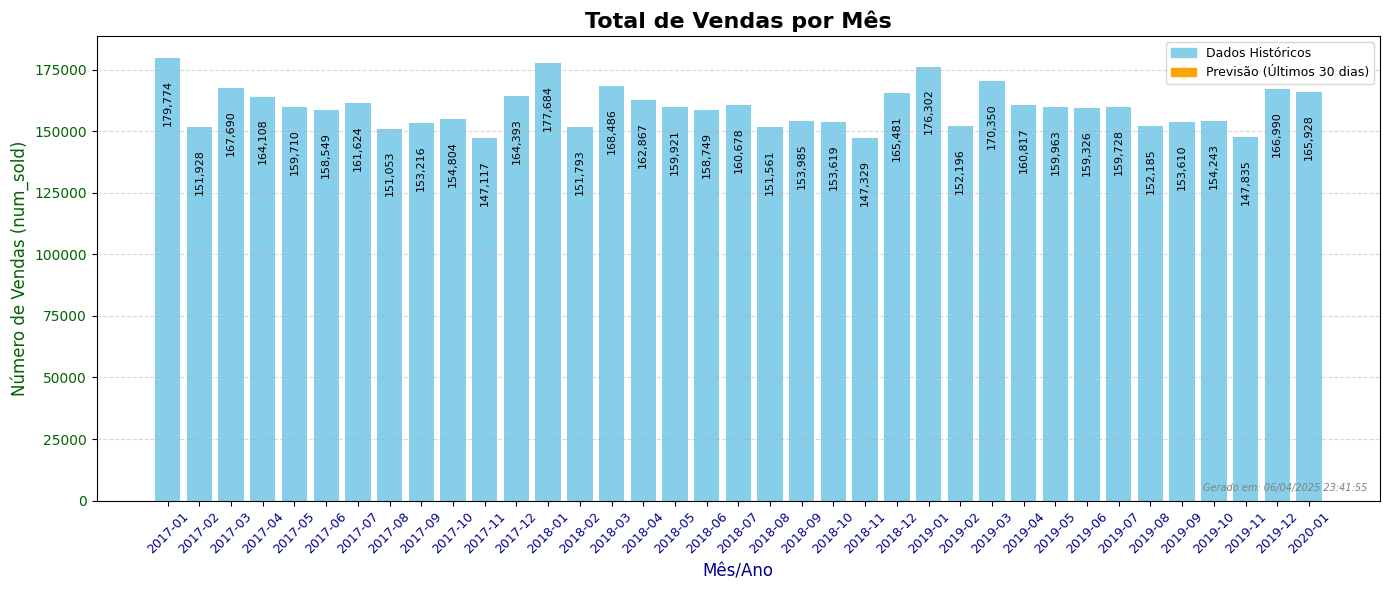

In [314]:
# Apresenta os dados historicos + dados previstos para os próximos 30 dias.

# Criar coluna de "ano-mês" para agrupamento
df_appended['ano_mes'] = df_appended['date'].dt.to_period('M')

# Agrupar as vendas por ano-mês
vendas_por_mes = df_appended.groupby('ano_mes')['num_sold'].sum().sort_index()

# Preparar dados para o gráfico
meses = vendas_por_mes.index.to_timestamp()
valores = vendas_por_mes.values

# Determinar os últimos 30 dias
data_limite = datetime.now() - timedelta(days=30)

# Criar lista de cores: azul para históricos, laranja para os últimos 30 dias
cores = ['skyblue' if mes < data_limite else 'orange' for mes in meses]

# Criar o gráfico
plt.figure(figsize=(14, 6))
bars = plt.bar(meses.strftime('%Y-%m'), valores, color=cores)

# Adicionar os valores no meio  das barras
for bar in bars:
    height = int(round(bar.get_height()))  # Arredondamento para inteiro
    plt.text(bar.get_x() + bar.get_width() / 2, height - max(valores)*0.05, f'{height:,}',
             ha='center', va='top', fontsize=8, rotation=90, color='black')

# Títulos e eixos
plt.title('Total de Vendas por Mês', fontsize=16, fontweight='bold')
plt.xlabel('Mês/Ano', fontsize=12, color='darkblue')
plt.ylabel('Número de Vendas (num_sold)', fontsize=12, color='darkgreen')
plt.xticks(rotation=45, fontsize=9, color='darkblue')
plt.yticks(fontsize=10, color='darkgreen')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Legenda
plt.legend(handles=[
    Patch(color='skyblue', label='Dados Históricos'),
    Patch(color='orange', label='Previsão (Últimos 30 dias)')
], loc='upper right', fontsize=9)

# Timestamp no gráfico
data_hora_atual = datetime.now().strftime('%d/%m/%Y %H:%M:%S')
plt.text(0.99, 0.02, f'Gerado em: {data_hora_atual}', horizontalalignment='right',
         transform=plt.gca().transAxes, color='gray', fontsize=7, fontstyle='italic')

# Exportar se necessário
exportar = 'nao'
if exportar == 'sim':
    nome_arquivo = f"grafico_previsao_mensal_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png"
    plt.savefig(nome_arquivo, dpi=300)
    print(f"Gráfico exportado como '{nome_arquivo}'.")

# Mostrar gráfico
plt.tight_layout()
plt.show()

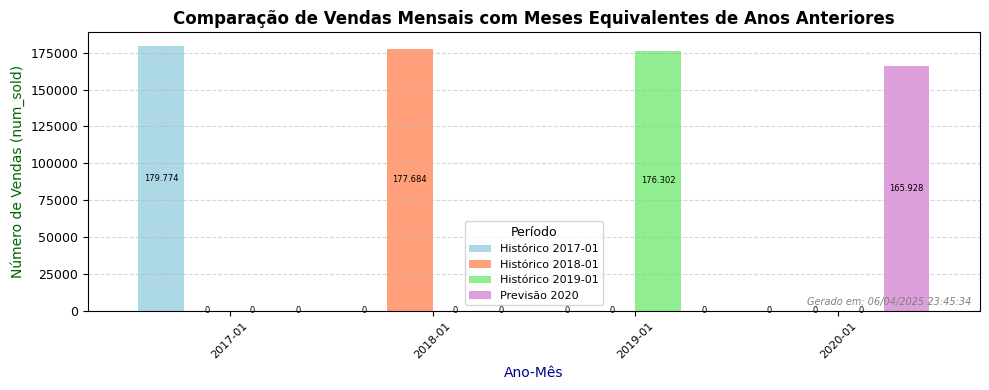

In [317]:
# Apresentar o comparativo dos mesmo período em anos anteriores

# Período previsto: últimos 30 dias da base
data_maxima = df_appended['date'].max()
data_inicio_previsao = data_maxima - timedelta(days=29)
data_fim_previsao = data_maxima

# Meses únicos do período previsto
meses_previstos = df_appended[(df_appended['date'] >= data_inicio_previsao) & (df_appended['date'] <= data_fim_previsao)]
meses_previstos['ano_mes'] = meses_previstos['date'].dt.to_period('M')
meses_previstos_unicos = meses_previstos['ano_mes'].unique()

# Anos anteriores
anos_anteriores = [ano for ano in df_appended['date'].dt.year.unique() if ano < data_maxima.year]
df_comparacao = []

# Coleta dados dos mesmos meses dos anos anteriores
for ano in anos_anteriores:
    for mes_period in meses_previstos_unicos:
        ano_mes_atual = pd.Period(f'{ano}-{mes_period.month:02}', freq='M')
        df_mes = df_appended[df_appended['date'].dt.to_period('M') == ano_mes_atual].copy()
        df_mes['tipo'] = f'Histórico {ano}-{mes_period.month:02}'
        df_mes['ano_mes'] = ano_mes_atual
        df_comparacao.append(df_mes)

# Adiciona o período de previsão
meses_previstos['tipo'] = f'Previsão {data_maxima.year}'
df_comparacao.append(meses_previstos)

# Junta tudo e agrupa por mês
df_plot = pd.concat(df_comparacao, ignore_index=True)
df_grouped = df_plot.groupby(['ano_mes', 'tipo'])['num_sold'].sum().reset_index()

# Pivotar para formato de gráfico
df_pivot = df_grouped.pivot(index='ano_mes', columns='tipo', values='num_sold').fillna(0)
df_pivot = df_pivot.sort_index()

# Lista de cores claras (tons pastel)
cores_claras_nomeadas = ['lightblue', 'lightsalmon', 'lightgreen', 'plum', 'lightcoral', 'wheat']

# Aplicar no gráfico
ax = df_pivot.plot(kind='bar', figsize=(10, 4), width=0.9, color=cores_claras_nomeadas)

# Adiciona os valores **dentro** das barras
#for container in ax.containers:
#    ax.bar_label(container, fmt='%.0f', label_type='center', fontsize=8, color='black')

# Adiciona os valores **dentro** das barras com formatação de milhar
for container in ax.containers:
    labels = [f'{int(v):,}'.replace(',', '.') for v in container.datavalues]  # Formata 1.000 ao invés de 1,000
    ax.bar_label(container, labels=labels, label_type='center', fontsize=6, color='black')


# Títulos e legendas
plt.title('Comparação de Vendas Mensais com Meses Equivalentes de Anos Anteriores', fontsize=12, fontweight='bold')
plt.xlabel('Ano-Mês', fontsize=10, color='darkblue')
plt.ylabel('Número de Vendas (num_sold)', fontsize=10, color='darkgreen')
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Período', fontsize=8, title_fontsize=9)

# Timestamp no gráfico
data_hora_atual = datetime.now().strftime('%d/%m/%Y %H:%M:%S')
plt.text(0.99, 0.02, f'Gerado em: {data_hora_atual}', horizontalalignment='right',
         transform=plt.gca().transAxes, color='gray', fontsize=7, fontstyle='italic')

# Exportar se necessário
exportar = 'nao'
if exportar == 'sim':
    nome_arquivo = f"grafico_previsao_mensal_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png"
    plt.savefig(nome_arquivo, dpi=300)
    print(f"Gráfico exportado como '{nome_arquivo}'.")

# Mostrar gráfico
plt.tight_layout()
plt.show()
